In [440]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
import matplotlib.dates as dates

import scipy as sp 
import seaborn as sns
import xlsxwriter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

seaborn.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
%matplotlib inline

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats

import pylab
import statistics 

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.rolling import RollingOLS

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import xlsxwriter
#from statsmodels.tsa.ar_model import AR
#from statsmodels.tsa.stattools import grangercausalitytests
#from statsmodels.tsa.tsatools import (lagmat, add_trend)

import datetime
import itertools

import sqlite3
from sqlite3 import Error

import eikon as ek
#creds = 'get your key'
#ek.set_app_key(creds)

# Data processing

In [441]:
# Import FX-data to python
FX = pd.read_excel("Foreign Exchange Data_FX.xlsx", index_col =0, skiprows=1)
FX.head()

,EUR_USD_Spot,CHF_USD_Spot,SEK_USD_Spot,JPY_USD_Spot,CNY_USD_Spot,GBP_USD_Spot,HKD_USD_Spot,SGD_USD_Spot,CAD_USD_Spot,AUD_USD_Spot
Time,,,,,,,,,,
2012-01-31,1.30785,0.92050,6.80295,76.230,6.30900,1.57580,7.75530,1.25825,1.00285,1.06160
2012-02-29,1.33260,0.90430,6.61650,81.225,6.29385,1.59170,7.75620,1.25060,0.98955,1.07315
2012-03-31,1.33440,0.90225,6.61310,82.815,6.29800,1.60130,7.76585,1.25780,0.99790,1.03455
2012-04-30,1.32405,0.90730,6.72370,79.795,6.30990,1.62325,7.75850,1.23735,0.98715,1.04255
2012-05-31,1.23585,0.97190,7.26940,78.365,6.36880,1.54045,7.76260,1.28880,1.03335,0.97295


In [442]:
# check the data for missing values: If 120 non-null there are no missing values
FX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2012-01-31 to 2021-12-31
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EUR_USD_Spot  120 non-null    float64
 1   CHF_USD_Spot  120 non-null    float64
 2   SEK_USD_Spot  120 non-null    float64
 3   JPY_USD_Spot  120 non-null    float64
 4   CNY_USD_Spot  120 non-null    float64
 5   GBP_USD_Spot  120 non-null    float64
 6   HKD_USD_Spot  120 non-null    float64
 7   SGD_USD_Spot  120 non-null    float64
 8   CAD_USD_Spot  120 non-null    float64
 9   AUD_USD_Spot  120 non-null    float64
dtypes: float64(10)
memory usage: 10.3 KB


In [443]:
# Creating a Loop to generate a Chart for the dependent variables
for col in FX.iteritems(): 
    print('plotting'+col[0])
    fig, ax = plt.subplots()
    indicator=FX[col[0]]
    ax.plot(indicator, alpha=0.9, color='blue')
    plt.title(col[0])
    #plt.savefig('Charts\Plot_'+col[0]+'.png')
    plt.close()

plottingEUR_USD_Spot
plottingCHF_USD_Spot
plottingSEK_USD_Spot
plottingJPY_USD_Spot
plottingCNY_USD_Spot
plottingGBP_USD_Spot
plottingHKD_USD_Spot
plottingSGD_USD_Spot
plottingCAD_USD_Spot
plottingAUD_USD_Spot


In [444]:
# Run an initial descriptive statistics analysis and compare it with API data below
FX.describe()

,EUR_USD_Spot,CHF_USD_Spot,SEK_USD_Spot,JPY_USD_Spot,CNY_USD_Spot,GBP_USD_Spot,HKD_USD_Spot,SGD_USD_Spot,CAD_USD_Spot,AUD_USD_Spot
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.191062,0.953203,8.170652,106.296792,6.516160,1.425377,7.777860,1.333663,1.226732,0.803145
std,0.092710,0.037693,1.050615,10.885388,0.306371,0.141705,0.033729,0.057854,0.126199,0.117219
min,1.051600,0.879950,6.361800,76.230000,6.053950,1.215800,7.750000,1.220200,0.983800,0.613600
25%,1.117238,0.918725,6.973825,102.707500,6.245237,1.303237,7.753000,1.275537,1.106150,0.722425
50%,1.168825,0.959200,8.463750,108.690000,6.458950,1.379925,7.758725,1.348575,1.277850,0.760825
75%,1.259075,0.985975,8.910087,112.501250,6.783375,1.554350,7.798375,1.372113,1.317375,0.890413
max,1.386750,1.028700,9.909650,124.145000,7.156800,1.710550,7.849900,1.448300,1.406150,1.073150


In [445]:
# Import Macro-data to python
Macro= pd.read_excel("Foreign Exchange Data_Macrovariables.xlsx", index_col =0, skiprows=1)
Macro=Macro.drop(['Money_Supplied_M1','Trade_Balance','Reserves'], axis=1)

Macro.head()

,Shortterm_Interest_Rate,Longterm_Interest_Rate,Stockmarket,Money_Supplied_M1_Value,Reserves_Value,Trade_Balance_Value,Unemployment,Consumer_Price_Index,Producer_Price_Index,Retail_Sales_Turnover
Time,,,,,,,,,,
2012-01-31,0.5424,1.79445,1312.41,2201800000000000,52279000000,-65662742000000,0.083,102.955,107.559,-0.21388
2012-02-29,0.4843,1.97305,1365.68,2207100000000000,51532000000,-59456811000000,0.083,103.026,107.837,0.04847
2012-03-31,0.4682,2.21330,1408.47,2227800000000000,51141000000,-66126317000000,0.082,103.227,107.948,0.11210
2012-04-30,0.4659,1.91810,1397.91,2237300000000000,51675000000,-63280174000000,0.082,103.420,107.893,-0.05119
2012-05-31,0.4669,1.56200,1310.33,2256200000000000,50295000000,-61698896000000,0.082,103.564,107.281,0.06530


In [446]:
# check the data for missing values: If 120 non-null there are no missing values
Macro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2012-01-31 to 2021-12-31
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Shortterm_Interest_Rate  120 non-null    float64
 1   Longterm_Interest_Rate   120 non-null    float64
 2   Stockmarket              120 non-null    float64
 3   Money_Supplied_M1_Value  120 non-null    int64  
 4   Reserves_Value           120 non-null    int64  
 5   Trade_Balance_Value      120 non-null    int64  
 6   Unemployment             120 non-null    float64
 7   Consumer_Price_Index     120 non-null    float64
 8   Producer_Price_Index     120 non-null    float64
 9   Retail_Sales_Turnover    120 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 10.3 KB


In [447]:
# Creating a Loop to generate a Chart for the independent variables
for col in Macro.iteritems(): 
    print('plotting'+col[0])
    fig, ax = plt.subplots()
    indicator=Macro[col[0]]
    ax.plot(indicator, alpha=0.9, color='blue')
    plt.title(col[0])
    #plt.savefig('Charts\Plot_'+col[0]+'.png')
    plt.close()

plottingShortterm_Interest_Rate
plottingLongterm_Interest_Rate
plottingStockmarket
plottingMoney_Supplied_M1_Value
plottingReserves_Value
plottingTrade_Balance_Value
plottingUnemployment
plottingConsumer_Price_Index
plottingProducer_Price_Index
plottingRetail_Sales_Turnover


In [448]:
# Run an initial descriptive statistics analysis and compare it with API data below
Macro.describe()

,Shortterm_Interest_Rate,Longterm_Interest_Rate,Stockmarket,Money_Supplied_M1_Value,Reserves_Value,Trade_Balance_Value,Unemployment,Consumer_Price_Index,Producer_Price_Index,Retail_Sales_Turnover
count,120.000000,120.000000,120.000000,1.200000e+02,1.200000e+02,1.200000e+02,120.000000,120.000000,120.000000,120.000000
mean,0.871802,2.006375,2477.824083,5.716782e+15,4.361575e+10,-6.782084e+13,0.057117,113.366325,111.732417,0.008111
std,0.828456,0.612322,829.131374,5.765262e+15,3.595933e+09,1.006454e+13,0.019447,6.742046,4.765921,0.092269
min,0.117800,0.532250,1310.330000,2.201800e+15,3.821900e+10,-1.006720e+14,0.035000,102.955000,105.334000,-0.225210
25%,0.245075,1.610912,1928.895000,2.821375e+15,4.123175e+10,-7.288850e+13,0.042000,107.576500,108.616000,-0.031590
50%,0.430450,2.034225,2258.850000,3.373100e+15,4.239400e+10,-6.467500e+13,0.051500,113.038000,110.979000,0.011870
75%,1.345725,2.467350,2917.100000,3.832500e+15,4.664775e+10,-6.065200e+13,0.067500,118.860750,113.635000,0.055307
max,2.807600,3.148250,4766.180000,2.042360e+16,5.227900e+10,-5.424026e+13,0.147000,128.660000,129.040000,0.288970


In [449]:
#Merging all the data into 1 Table:
 #Merge all the DataFrames into a new DataFrame
mergeddata_macroandFX=pd.concat([FX, Macro], axis=1)
mergeddata_macroandFX.head()

,EUR_USD_Spot,CHF_USD_Spot,SEK_USD_Spot,JPY_USD_Spot,CNY_USD_Spot,GBP_USD_Spot,HKD_USD_Spot,SGD_USD_Spot,CAD_USD_Spot,AUD_USD_Spot,Shortterm_Interest_Rate,Longterm_Interest_Rate,Stockmarket,Money_Supplied_M1_Value,Reserves_Value,Trade_Balance_Value,Unemployment,Consumer_Price_Index,Producer_Price_Index,Retail_Sales_Turnover
Time,,,,,,,,,,,,,,,,,,,,
2012-01-31,1.30785,0.92050,6.80295,76.230,6.30900,1.57580,7.75530,1.25825,1.00285,1.06160,0.5424,1.79445,1312.41,2201800000000000,52279000000,-65662742000000,0.083,102.955,107.559,-0.21388
2012-02-29,1.33260,0.90430,6.61650,81.225,6.29385,1.59170,7.75620,1.25060,0.98955,1.07315,0.4843,1.97305,1365.68,2207100000000000,51532000000,-59456811000000,0.083,103.026,107.837,0.04847
2012-03-31,1.33440,0.90225,6.61310,82.815,6.29800,1.60130,7.76585,1.25780,0.99790,1.03455,0.4682,2.21330,1408.47,2227800000000000,51141000000,-66126317000000,0.082,103.227,107.948,0.11210
2012-04-30,1.32405,0.90730,6.72370,79.795,6.30990,1.62325,7.75850,1.23735,0.98715,1.04255,0.4659,1.91810,1397.91,2237300000000000,51675000000,-63280174000000,0.082,103.420,107.893,-0.05119
2012-05-31,1.23585,0.97190,7.26940,78.365,6.36880,1.54045,7.76260,1.28880,1.03335,0.97295,0.4669,1.56200,1310.33,2256200000000000,50295000000,-61698896000000,0.082,103.564,107.281,0.06530


# Stationary test

In [450]:
var_list=['EUR_USD_Spot', 'CHF_USD_Spot', 'SEK_USD_Spot', 'JPY_USD_Spot', 'CNY_USD_Spot', 'GBP_USD_Spot', 'HKD_USD_Spot', 'SGD_USD_Spot', 'CAD_USD_Spot', 'AUD_USD_Spot']


for lags in range(1,11):
    print('Number of lags used:',lags)
    print('ADF P-Val for FX-Rates (Level)')
    for i in var_list:
        adf_library = adfuller(FX[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(FX[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library[1],)
    print('____________________________________________','\n')

Number of lags used: 1
ADF P-Val for FX-Rates (Level)
EUR_USD_Spot : 0.35
CHF_USD_Spot : 0.66
SEK_USD_Spot : 0.89
JPY_USD_Spot : 0.90
CNY_USD_Spot : 0.68
GBP_USD_Spot : 0.34
HKD_USD_Spot : 0.80
SGD_USD_Spot : 0.80
CAD_USD_Spot : 0.88
AUD_USD_Spot : 0.08
____________________________________________ 

Number of lags used: 2
ADF P-Val for FX-Rates (Level)
EUR_USD_Spot : 0.36
CHF_USD_Spot : 0.68
SEK_USD_Spot : 0.89
JPY_USD_Spot : 0.87
CNY_USD_Spot : 0.68
GBP_USD_Spot : 0.35
HKD_USD_Spot : 0.78
SGD_USD_Spot : 0.79
CAD_USD_Spot : 0.87
AUD_USD_Spot : 0.13
____________________________________________ 

Number of lags used: 3
ADF P-Val for FX-Rates (Level)
EUR_USD_Spot : 0.38
CHF_USD_Spot : 0.67
SEK_USD_Spot : 0.90
JPY_USD_Spot : 0.89
CNY_USD_Spot : 0.66
GBP_USD_Spot : 0.31
HKD_USD_Spot : 0.78
SGD_USD_Spot : 0.83
CAD_USD_Spot : 0.93
AUD_USD_Spot : 0.07
____________________________________________ 

Number of lags used: 4
ADF P-Val for FX-Rates (Level)
EUR_USD_Spot : 0.53
CHF_USD_Spot : 0.57
SEK

In [451]:
#The data appears not to be stationary, therefore it's followed by an additional stationary test with a percentage change (Mom)

In [452]:
for lags in range(1,11):
    print('Number of lags used:',lags)
    print('ADF P-Val for FX-Rates MoM (1st Difference)')
    for i in var_list:
        adf_library = adfuller(FX[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(FX[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library_d[1])
    print('____________________________________________','\n')

Number of lags used: 1
ADF P-Val for FX-Rates MoM (1st Difference)
EUR_USD_Spot : 0.00
CHF_USD_Spot : 0.00
SEK_USD_Spot : 0.00
JPY_USD_Spot : 0.00
CNY_USD_Spot : 0.00
GBP_USD_Spot : 0.00
HKD_USD_Spot : 0.00
SGD_USD_Spot : 0.00
CAD_USD_Spot : 0.00
AUD_USD_Spot : 0.00
____________________________________________ 

Number of lags used: 2
ADF P-Val for FX-Rates MoM (1st Difference)
EUR_USD_Spot : 0.00
CHF_USD_Spot : 0.00
SEK_USD_Spot : 0.00
JPY_USD_Spot : 0.00
CNY_USD_Spot : 0.00
GBP_USD_Spot : 0.00
HKD_USD_Spot : 0.00
SGD_USD_Spot : 0.00
CAD_USD_Spot : 0.00
AUD_USD_Spot : 0.00
____________________________________________ 

Number of lags used: 3
ADF P-Val for FX-Rates MoM (1st Difference)
EUR_USD_Spot : 0.00
CHF_USD_Spot : 0.00
SEK_USD_Spot : 0.00
JPY_USD_Spot : 0.00
CNY_USD_Spot : 0.00
GBP_USD_Spot : 0.00
HKD_USD_Spot : 0.00
SGD_USD_Spot : 0.00
CAD_USD_Spot : 0.00
AUD_USD_Spot : 0.00
____________________________________________ 

Number of lags used: 4
ADF P-Val for FX-Rates MoM (1st Dif

In [453]:
#Because the P-Values are below 0.05, the 0-Hyptothesis can be accepted. Therefore the data-series with the first differene (MoM) is non-stationary and has a unit root. 
#As a next step, the data will be converted into MoM-Data (Percentage Change). This will not only be done for the FX-Rates but the macroeconomics variables (but not for the Retail Sales Turnover, these figures are already shown in percentage change originally)
mergeddata_macroandFX_change=mergeddata_macroandFX.drop(['Retail_Sales_Turnover'], axis=1)
mergeddata_macroandFX_change = mergeddata_macroandFX_change.pct_change().add_suffix('_MOM').dropna()
new=mergeddata_macroandFX[['Retail_Sales_Turnover']].copy()
mergeddata_macroandFX_change=pd.concat([mergeddata_macroandFX_change, new], axis=1).dropna()
mergeddata_macroandFX_change.rename(columns={'Retail_Sales_Turnover': 'Retail_Sales_Turnover_MOM', }, inplace=True)
mergeddata_macroandFX_change.head()

,EUR_USD_Spot_MOM,CHF_USD_Spot_MOM,SEK_USD_Spot_MOM,JPY_USD_Spot_MOM,CNY_USD_Spot_MOM,GBP_USD_Spot_MOM,HKD_USD_Spot_MOM,SGD_USD_Spot_MOM,CAD_USD_Spot_MOM,AUD_USD_Spot_MOM,Shortterm_Interest_Rate_MOM,Longterm_Interest_Rate_MOM,Stockmarket_MOM,Money_Supplied_M1_Value_MOM,Reserves_Value_MOM,Trade_Balance_Value_MOM,Unemployment_MOM,Consumer_Price_Index_MOM,Producer_Price_Index_MOM,Retail_Sales_Turnover_MOM
Time,,,,,,,,,,,,,,,,,,,,
2012-02-29,0.018924,-0.017599,-0.027407,0.065525,-0.002401,0.010090,0.000116,-0.006080,-0.013262,0.010880,-0.107117,0.099529,0.040589,0.002407,-0.014289,-0.094512,0.000000,0.000690,0.002585,0.04847
2012-03-31,0.001351,-0.002267,-0.000514,0.019575,0.000659,0.006031,0.001244,0.005757,0.008438,-0.035969,-0.033244,0.121766,0.031332,0.009379,-0.007588,0.112174,-0.012048,0.001951,0.001029,0.11210
2012-04-30,-0.007756,0.005597,0.016724,-0.036467,0.001889,0.013708,-0.000946,-0.016259,-0.010773,0.007733,-0.004912,-0.133376,-0.007497,0.004264,0.010442,-0.043041,0.000000,0.001870,-0.000510,-0.05119
2012-05-31,-0.066614,0.071200,0.081161,-0.017921,0.009335,-0.051009,0.000528,0.041581,0.046801,-0.066759,0.002146,-0.185652,-0.062651,0.008448,-0.026705,-0.024989,0.000000,0.001392,-0.005672,0.06530
2012-06-30,0.024396,-0.024025,-0.047789,0.018376,-0.002379,0.019734,-0.000683,-0.018350,-0.016161,0.052469,-0.013493,0.051440,0.039555,0.008466,0.004454,-0.037142,0.000000,0.001738,-0.004148,-0.04212


# Normality test

In [454]:
#Normality test 1: for the FX-Changes
FX_Change=FX.pct_change(periods=1).add_suffix('_MOM').dropna()
#Histograms for each individual series  
df=pd.DataFrame(FX_Change)
df.dropna(axis='rows',inplace=True)

for col in df.iteritems(): 
    print('histogram for '+col[0])
    fig, ax = plt.subplots()
    indicator=df[col[0]]
    ax.hist(indicator, alpha=0.9, color='blue',bins=20)
    plt.title(col[0])
    #plt.savefig('Charts\Hist_'+col[0]+'.png')
    plt.close()

histogram for EUR_USD_Spot_MOM
histogram for CHF_USD_Spot_MOM
histogram for SEK_USD_Spot_MOM
histogram for JPY_USD_Spot_MOM
histogram for CNY_USD_Spot_MOM
histogram for GBP_USD_Spot_MOM
histogram for HKD_USD_Spot_MOM
histogram for SGD_USD_Spot_MOM
histogram for CAD_USD_Spot_MOM
histogram for AUD_USD_Spot_MOM


Text(0.5, 1.0, 'Q-Q Plot for HKD')

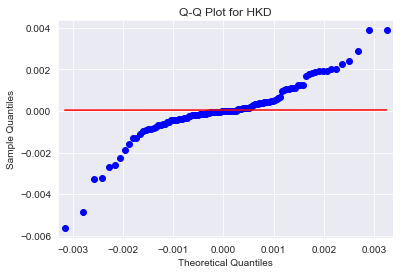

In [455]:
# Normality Test 2: Q-Q Plot as an additional Normality Test for JPY due to leptokurtic curve

HKD_QQ_Plot=FX_Change['HKD_USD_Spot_MOM']
mean1=statistics.mean(HKD_QQ_Plot) 
st_dev1=statistics.stdev(HKD_QQ_Plot)
obs_count1=len(HKD_QQ_Plot)
sm.qqplot(HKD_QQ_Plot, loc = mean1, scale = st_dev1, line='s')
plt.title('Q-Q Plot for HKD')
#plt.savefig('Charts\Q_Q_HKD.png')

In [456]:
# Normality Test 3: Shapiro-Wilk Test for HKD_Change due to leptokurtic curve

stat,p=sp.stats.shapiro(HKD_QQ_Plot)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
7.419745884362783e-08
Sample does not look Gaussian (reject H0)


In [457]:
#Some of the data does not look normally distributed. 

# Descriptive statistics

In [458]:
# Create smaller datasets by selecting dates from the index

sample_1=mergeddata_macroandFX_change[0:29] #02.12 - 06.14 
sample_2=mergeddata_macroandFX_change[29:59] #07.14 - 12.16
sample_3=mergeddata_macroandFX_change[59:89] #01.17 - 06.19
sample_4=mergeddata_macroandFX_change[89:120] #07.19 - 12.21
sample_5=mergeddata_macroandFX_change[0:120] #02.12 - 12.21 

def nans(shape, dtype=float):
    a = np.empty(shape, dtype)
    a.fill(np.nan)
    return a

subsample_list=['Statistic','02.12 - 06.14 ','07.14 - 12.16','01.17 - 06.19','07.19 - 12.21', '02.12 - 12.21']
table_empty = nans([10,6])

desc_stat_table = pd.DataFrame(table_empty,columns=subsample_list)

desc_stat_table.iloc[0, 0]= 'Standard Deviation of US Shortterm Interest Rate_MOM'
desc_stat_table.iloc[1, 0]= 'Standard Deviation of US Longterm Interest Rate_MOM'
desc_stat_table.iloc[2, 0]= 'Standard Deviation of US Stockmarket_MOM'
desc_stat_table.iloc[3, 0]= 'Standard Deviation of US Money Supplied M1 Value_MOM'
desc_stat_table.iloc[4, 0]= 'Standard Deviation of US Reserves Value_MOM'
desc_stat_table.iloc[5, 0]= 'Mean of US Trade Balance Value_MOM'
desc_stat_table.iloc[6, 0]= 'Mean of US Unemployment_MOM'
desc_stat_table.iloc[7, 0]= 'Mean of US Consumer Price Index_MOM'
desc_stat_table.iloc[8, 0]= 'Mean of US Producer Price Index_MOM'
desc_stat_table.iloc[9, 0]= 'Mean of US Retail Sales Turnover_MOM'

samples = [sample_1,sample_2,sample_3,sample_4, sample_5]
a=1

for b in samples:
    desc_stat_table.iloc[0, a] = round(np.std(b['Shortterm_Interest_Rate_MOM']),3)
    desc_stat_table.iloc[1, a] = round(np.std(b['Longterm_Interest_Rate_MOM']),3)
    desc_stat_table.iloc[2, a] = round(np.std(b['Stockmarket_MOM']),3)
    desc_stat_table.iloc[3, a] = round(np.std(b['Money_Supplied_M1_Value_MOM']),3)
    desc_stat_table.iloc[4, a] = round(np.std(b['Reserves_Value_MOM']),3)
    desc_stat_table.iloc[5, a] = round(np.average(b['Trade_Balance_Value_MOM']),3)
    desc_stat_table.iloc[6, a] = round(np.average(b['Unemployment_MOM']),3)
    desc_stat_table.iloc[7, a] = round(np.average(b['Consumer_Price_Index_MOM']),3)
    desc_stat_table.iloc[8, a] = round(np.average(b['Producer_Price_Index_MOM']),3)
    desc_stat_table.iloc[9, a] = round(np.average(b['Retail_Sales_Turnover_MOM']),3)
    a=a+1
    print(a)

desc_stat_table

2
3
4
5
6


,Statistic,02.12 - 06.14,07.14 - 12.16,01.17 - 06.19,07.19 - 12.21,02.12 - 12.21
0,Standard Deviation of US Shortterm Interest Ra...,0.038,0.097,0.051,0.166,0.111
1,Standard Deviation of US Longterm Interest Rat...,0.099,0.110,0.062,0.168,0.116
2,Standard Deviation of US Stockmarket_MOM,0.027,0.031,0.037,0.050,0.038
3,Standard Deviation of US Money Supplied M1 Val...,0.005,0.009,0.007,0.428,0.218
4,Standard Deviation of US Reserves Value_MOM,0.012,0.023,0.014,0.014,0.017
5,Mean of US Trade Balance Value_MOM,-0.001,0.004,0.006,0.013,0.005
6,Mean of US Unemployment_MOM,-0.010,-0.008,-0.009,0.044,0.004
7,Mean of US Consumer Price Index_MOM,0.001,0.002,0.002,0.003,0.002
8,Mean of US Producer Price Index_MOM,0.001,-0.001,0.002,0.004,0.002
9,Mean of US Retail Sales Turnover_MOM,0.010,0.011,0.003,0.015,0.010


In [459]:
Macro_Change=mergeddata_macroandFX_change.drop(['EUR_USD_Spot_MOM','CHF_USD_Spot_MOM', 'SEK_USD_Spot_MOM', 'JPY_USD_Spot_MOM', 'CNY_USD_Spot_MOM', 'GBP_USD_Spot_MOM', 'HKD_USD_Spot_MOM', 'SGD_USD_Spot_MOM', 'CAD_USD_Spot_MOM', 'AUD_USD_Spot_MOM'], axis=1)
FX_Change=mergeddata_macroandFX_change.drop(['Shortterm_Interest_Rate_MOM', 'Longterm_Interest_Rate_MOM', 'Stockmarket_MOM', 'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM',	'Unemployment_MOM',	'Consumer_Price_Index_MOM',	'Producer_Price_Index_MOM',	'Retail_Sales_Turnover_MOM'], axis=1)
FX_Change.describe().loc[["mean", "std", "min", "max"]].T

,mean,std,min,max
EUR_USD_Spot_MOM,-0.000949,0.021303,-0.066950,0.048340
CHF_USD_Spot_MOM,0.000157,0.021595,-0.073573,0.071200
SEK_USD_Spot_MOM,0.002744,0.026696,-0.057809,0.081161
JPY_USD_Spot_MOM,0.003761,0.024385,-0.069101,0.092015
CNY_USD_Spot_MOM,0.000124,0.011170,-0.033481,0.039605
GBP_USD_Spot_MOM,-0.001007,0.023366,-0.080605,0.055560
HKD_USD_Spot_MOM,0.000045,0.001340,-0.005625,0.003884
SGD_USD_Spot_MOM,0.000678,0.013538,-0.041373,0.041581
CAD_USD_Spot_MOM,0.002192,0.022462,-0.048158,0.095607
AUD_USD_Spot_MOM,-0.002766,0.029105,-0.076994,0.072249


# Check for multi- or perfect collinearity

In [586]:
# Check for the OLS assumption A4:
#A1: Linear in parameters
#A2: Random sampling of observation
#A3: Conditional mean should be zero
#A4: There is no multi-collinearity or perfect collinearity
#A5: Spherical errors: There is no homoscedasticity and no autocorrelation
#A6: Error terms should be normally distributed

corr = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM', 'Money_Supplied_M1_Value_MOM', 
                    'Reserves_Value_MOM','Trade_Balance_Value_MOM', 'Unemployment_MOM', 'Consumer_Price_Index_MOM', 
                     'Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']].corr()
corr

,Shortterm_Interest_Rate_MOM,Longterm_Interest_Rate_MOM,Stockmarket_MOM,Money_Supplied_M1_Value_MOM,Reserves_Value_MOM,Trade_Balance_Value_MOM,Unemployment_MOM,Consumer_Price_Index_MOM,Producer_Price_Index_MOM,Retail_Sales_Turnover_MOM
Shortterm_Interest_Rate_MOM,1.000000,0.103981,-0.223513,-0.342717,-0.081713,0.057543,-0.478539,0.213498,0.038347,0.188612
Longterm_Interest_Rate_MOM,0.103981,1.000000,0.329767,0.000605,-0.192608,0.010084,-0.111166,-0.030843,0.383676,0.105920
Stockmarket_MOM,-0.223513,0.329767,1.000000,0.089330,0.113367,-0.142990,0.221901,0.079481,0.119143,-0.004521
Money_Supplied_M1_Value_MOM,-0.342717,0.000605,0.089330,1.000000,0.046501,0.052462,0.003721,-0.171272,0.211502,0.228229
Reserves_Value_MOM,-0.081713,-0.192608,0.113367,0.046501,1.000000,-0.064873,0.011785,0.071539,-0.004155,-0.071622
Trade_Balance_Value_MOM,0.057543,0.010084,-0.142990,0.052462,-0.064873,1.000000,0.106366,-0.035763,0.072077,0.017435
Unemployment_MOM,-0.478539,-0.111166,0.221901,0.003721,0.011785,0.106366,1.000000,-0.404946,-0.455800,-0.171251
Consumer_Price_Index_MOM,0.213498,-0.030843,0.079481,-0.171272,0.071539,-0.035763,-0.404946,1.000000,0.362289,0.026500
Producer_Price_Index_MOM,0.038347,0.383676,0.119143,0.211502,-0.004155,0.072077,-0.455800,0.362289,1.000000,0.162196
Retail_Sales_Turnover_MOM,0.188612,0.105920,-0.004521,0.228229,-0.071622,0.017435,-0.171251,0.026500,0.162196,1.000000


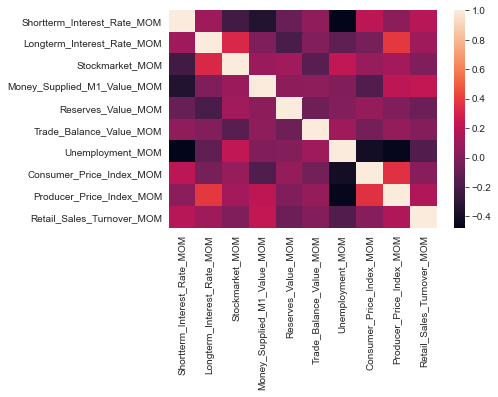

In [587]:
# Visualize the Chek for no perfect correlation between the independent variables
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#plt.savefig('Charts\Heatmap.png', dpi=300, bbox_inches = "tight")

In [588]:
#The heatmap shows, there is no multi-collinearity or perfect collinearity

In [589]:
#Code for VIF Calculation 
# Adjusted for Endogenity
# Writing a function to calculate the VIF values

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(formula="y~x", data=x_vars,endog=y, exog=x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

# OLS-Model for EUR variable

In [590]:
# Loop for EUR

#x1 using all the variables since there is no perfect correlation which can be found in the chart Visualization Check for Correlation
#x2 excluding one variable from the entire model which has the highest P-Value when considering the model with all variables: Trade Balance  
#x3 excluding one varibale from the entire model which has the second highest P-Value when considering the model with all variables: Money Supplied M1
#x4 excluding one variable form the entire model which has the highest standard error when considerning the model with all variables: CPI 
#x5: excluding all the variables from entire Model which are not significat at alpha 0.1 - P-Value higher 0.1: Trade Balance, M1, CPI, PPI and Retails Sales Turnover

y=FX_Change [['EUR_USD_Spot_MOM']]
x1=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                  'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x2=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 'Unemployment_MOM', 
                 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x3=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Reserves_Value_MOM','Trade_Balance_Value_MOM', 'Unemployment_MOM', 
                 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x4=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                  'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x5=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Reserves_Value_MOM','Unemployment_MOM']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):
    
    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       EUR_USD_Spot_MOM   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     36.56
Date:                Sun, 29 May 2022   Prob (F-statistic):           3.32e-30
Time:                        12:22:14   Log-Likelihood:                 377.62
No. Observations:                 119   AIC:                            -733.2
Df Residuals:                     108   BIC:                            -702.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [591]:
#Extract the Betas & T-Valiue of the most promising model choosen based on R2 adjusted: Model x5
y=FX_Change [['EUR_USD_Spot_MOM']]
x=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Reserves_Value_MOM','Unemployment_MOM']]
x= sm.add_constant(x)
model = sm.OLS(y,x, missing='drop')
results =model.fit()
OLS_results_EUR_P = pd.DataFrame(results.params)
OLS_results_EUR_T = pd.DataFrame(results.tvalues)
OLS_results_EUR = pd.concat([OLS_results_EUR_P, OLS_results_EUR_T], axis=1)
OLS_results_EUR['Currency'] = 'EUR_USD'
OLS_results_EUR.drop(['const'])
OLS_results_EUR.columns = ['Beta', 'T_Value', 'Currency']
OLS_results_EUR=OLS_results_EUR.drop(['const'])


# Multicollinearity VIF-Calculation

In [592]:
#Calculating VIF values using that function
vif_cal(input_data = mergeddata_macroandFX_change[['EUR_USD_Spot_MOM',
                                    'Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Reserves_Value_MOM','Unemployment_MOM']], 
                                    dependent_col='EUR_USD_Spot_MOM')

Shortterm_Interest_Rate_MOM  VIF =  1.34
Longterm_Interest_Rate_MOM  VIF =  1.25
Stockmarket_MOM  VIF =  1.27
Reserves_Value_MOM  VIF =  1.07
Unemployment_MOM  VIF =  1.35


# Chow-test for most promising EUR-model

In [593]:
# Most promising model choosen based on R2 adjusted: Model x5 
# Running the Chow-Test:

Y = FX_Change['EUR_USD_Spot_MOM']
X = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM','Reserves_Value_MOM', 'Unemployment_MOM']]

# Model for the first 5 years
Y_1 = FX_Change['EUR_USD_Spot_MOM'][:60]
X_1 = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM','Reserves_Value_MOM', 'Unemployment_MOM']][:60]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = FX_Change['EUR_USD_Spot_MOM'][60:]
X_2 = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM','Reserves_Value_MOM', 'Unemployment_MOM']][60:]

X_2 = sm.add_constant(X_2)

X = sm.add_constant(X)

In [594]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       EUR_USD_Spot_MOM   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     36.30
Date:                Sun, 29 May 2022   Prob (F-statistic):           4.17e-16
Time:                        12:22:15   Log-Likelihood:                 183.07
No. Observations:                  60   AIC:                            -354.1
Df Residuals:                      54   BIC:                            -341.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0004      0.002     -0.192      0.848      -0.004       0.003
Shortterm_Interest_Rate_MOM    -0.0218      0.019     -1.153      0.254      -0.060       0.016
Longterm_Interest_Rate_MOM      0.0723      0.017      4.332      0.000       0.039       0.106
Stockmarket_MOM                 0.1385      0.058      2.386      0.021       0.022       0.255
Reserves_Value_MOM              1.0133      0.084     12.101      0.000       0.845       1.181
Unemployment_MOM                0.0091      0.069      0.133      0.895      -0.128       0.147
==============================================================================
Omnibus:                        1.665   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.435   Jarque-Bera (JB):                1.458
Skew:                           0.377   Prob(JB):                        0.482
Kurtosis:                       2.879   Cond. No.                         54.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [595]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       EUR_USD_Spot_MOM   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     78.60
Date:                Sun, 29 May 2022   Prob (F-statistic):           2.80e-23
Time:                        12:22:15   Log-Likelihood:                 216.64
No. Observations:                  59   AIC:                            -421.3
Df Residuals:                      53   BIC:                            -408.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0002      0.001      0.171      0.865      -0.002       0.002
Shortterm_Interest_Rate_MOM    -0.0085      0.008     -1.069      0.290      -0.025       0.007
Longterm_Interest_Rate_MOM      0.0160      0.008      2.078      0.043       0.001       0.031
Stockmarket_MOM                 0.0311      0.023      1.380      0.173      -0.014       0.076
Reserves_Value_MOM              1.1799      0.065     18.065      0.000       1.049       1.311
Unemployment_MOM               -0.0053      0.003     -1.535      0.131      -0.012       0.002
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.893
Skew:                          -0.264   Prob(JB):                        0.640
Kurtosis:                       2.708   Cond. No.                         77.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [596]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]
print(J,k,N1,N2)

6 6 60 59


In [597]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [598]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, (N1+N2-2*k))


0.9995012410576205

# Rolling  regression for most promising EUR-model

In [599]:
# Prepare the Data for the Rolling Regression of the Betas

Macro_Change['const']=1

X= Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM','Reserves_Value_MOM', 'Unemployment_MOM', 'const']]

Y_EUR=FX_Change['EUR_USD_Spot_MOM']


In [600]:
endog = Y_EUR.values
exog = sm.add_constant(X)
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.describe()


,Shortterm_Interest_Rate_MOM,Longterm_Interest_Rate_MOM,Stockmarket_MOM,Reserves_Value_MOM,Unemployment_MOM,const
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,-0.013426,0.043823,0.078615,1.081839,-0.011517,-0.001091
std,0.028076,0.021883,0.073468,0.087376,0.077394,0.001341
min,-0.112688,0.004252,-0.011374,0.839272,-0.168619,-0.004165
25%,-0.012332,0.026047,0.034865,1.009963,-0.058020,-0.002093
50%,-0.006306,0.052624,0.052719,1.094131,-0.011357,-0.000947
75%,-0.000221,0.061435,0.078758,1.157146,-0.003604,-0.000197
max,0.029640,0.076903,0.286867,1.220074,0.172843,0.002432


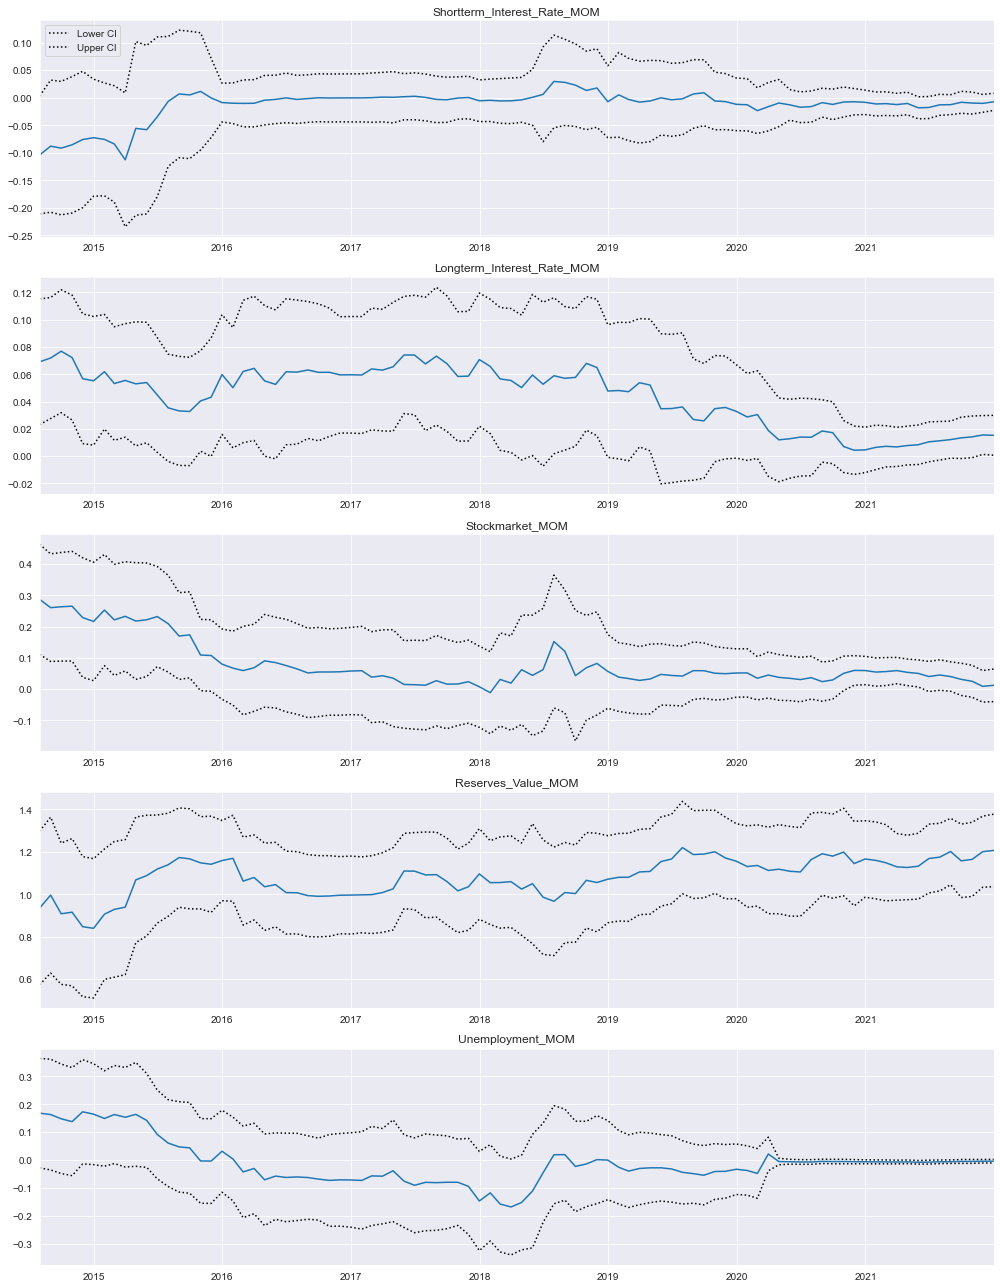

In [601]:
#Plot the variables to decide if the beta is robust over time or not:
exog_vars = ["Shortterm_Interest_Rate_MOM","Longterm_Interest_Rate_MOM","Stockmarket_MOM","Reserves_Value_MOM", "Unemployment_MOM"]
exog = sm.add_constant(Macro_Change[exog_vars])
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
fig = rres.plot_recursive_coefficient(variables=exog_vars, figsize=(14, 18))
#plt.savefig('RollingRegression_EUR_USD.png')


# OLS-Model for CHF variable

In [602]:
# Loop for CHF

#x1 using all the variables since there is no perfect correlation which can be found in the chart Visualization Check for Correlation
#x2 excluding one variable from the entire model which has the highest P-Value when considering the model with all variables: Trade Balance  
#x3 excluding one varibale from the entire model which has the second highest P-Value when considering the model with all variables: Retail Sales
#x4 excluding one variable form the entire model which has the highest standard error when considerning the model with all variables: CPI 
#x5: excluding all the variables from entire Model which are not significat at alpha 0.1 - P-Value higher 0.1: Long term interest, Stockmarket, Trade Balance, M1, CPI,  and Retails Sales Turnover

y=FX_Change [['CHF_USD_Spot_MOM']]
x1=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x2=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 'Unemployment_MOM', 
                 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x3=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM']]

x4=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x5=Macro_Change[['Shortterm_Interest_Rate_MOM', 'Reserves_Value_MOM',
                    'Unemployment_MOM','Producer_Price_Index_MOM']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       CHF_USD_Spot_MOM   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     10.73
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.85e-12
Time:                        12:22:18   Log-Likelihood:                 329.11
No. Observations:                 119   AIC:                            -636.2
Df Residuals:                     108   BIC:                            -605.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [603]:
#Extract the Betas & T-Value of the most promising model choosen based on R2 adjusted: Model x5
y = FX_Change['CHF_USD_Spot_MOM']
x = Macro_Change[['Shortterm_Interest_Rate_MOM', 'Reserves_Value_MOM', 'Unemployment_MOM','Producer_Price_Index_MOM']]
x= sm.add_constant(x)
model = sm.OLS(y,x, missing='drop')
results =model.fit()
OLS_results_CHF_P = pd.DataFrame(results.params)
OLS_results_CHF_T = pd.DataFrame(results.tvalues)
OLS_results_CHF = pd.concat([OLS_results_CHF_P, OLS_results_CHF_T], axis=1)
OLS_results_CHF['Currency'] = 'CHF_USD'
OLS_results_CHF.columns = ['Beta', 'T_Value', 'Currency']
OLS_results_CHF=OLS_results_CHF.drop(['const'])

# Multicollinearity VIF-Calculation

In [604]:
#Calculating VIF values using that function
vif_cal(input_data = mergeddata_macroandFX_change[['CHF_USD_Spot_MOM',
                                    'Shortterm_Interest_Rate_MOM', 'Reserves_Value_MOM', 'Unemployment_MOM','Producer_Price_Index_MOM']], 
                                    dependent_col='CHF_USD_Spot_MOM')

Shortterm_Interest_Rate_MOM  VIF =  1.38
Reserves_Value_MOM  VIF =  1.01
Unemployment_MOM  VIF =  1.69
Producer_Price_Index_MOM  VIF =  1.31


# Chow-test for most promising CHF-model

In [605]:
# Most promising model choosen based on R2 adjusted: Model x5 
# Running the Chow-Test:

Y = FX_Change['CHF_USD_Spot_MOM']
X = Macro_Change[['Shortterm_Interest_Rate_MOM', 'Reserves_Value_MOM', 'Unemployment_MOM','Producer_Price_Index_MOM']]

# Model for the first 5 years
Y_1 = FX_Change['CHF_USD_Spot_MOM'][:60]
X_1 = Macro_Change[['Shortterm_Interest_Rate_MOM', 'Reserves_Value_MOM', 'Unemployment_MOM','Producer_Price_Index_MOM']][:60]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = FX_Change['CHF_USD_Spot_MOM'][60:]
X_2 = Macro_Change[['Shortterm_Interest_Rate_MOM', 'Reserves_Value_MOM', 'Unemployment_MOM','Producer_Price_Index_MOM']][60:]

X_2 = sm.add_constant(X_2)

X = sm.add_constant(X)

In [606]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       CHF_USD_Spot_MOM   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     11.25
Date:                Sun, 29 May 2022   Prob (F-statistic):           9.66e-07
Time:                        12:22:19   Log-Likelihood:                 156.10
No. Observations:                  60   AIC:                            -302.2
Df Residuals:                      55   BIC:                            -291.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0042      0.003     -1.569      0.122      -0.010       0.001
Shortterm_Interest_Rate_MOM     0.0502      0.030      1.692      0.096      -0.009       0.110
Reserves_Value_MOM             -0.7609      0.130     -5.868      0.000      -1.021      -0.501
Unemployment_MOM               -0.1676      0.105     -1.596      0.116      -0.378       0.043
Producer_Price_Index_MOM        0.8003      0.443      1.809      0.076      -0.086       1.687
==============================================================================
Omnibus:                       19.692   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.879
Skew:                          -0.634   Prob(JB):                     7.44e-18
Kurtosis:                       8.472   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [607]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       CHF_USD_Spot_MOM   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     23.44
Date:                Sun, 29 May 2022   Prob (F-statistic):           2.85e-11
Time:                        12:22:19   Log-Likelihood:                 182.13
No. Observations:                  59   AIC:                            -354.3
Df Residuals:                      54   BIC:                            -343.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0010      0.002     -0.589      0.558      -0.004       0.002
Shortterm_Interest_Rate_MOM     0.0171      0.014      1.177      0.244      -0.012       0.046
Reserves_Value_MOM             -0.9946      0.113     -8.776      0.000      -1.222      -0.767
Unemployment_MOM                0.0078      0.007      1.041      0.303      -0.007       0.023
Producer_Price_Index_MOM        0.0935      0.253      0.370      0.713      -0.413       0.600
==============================================================================
Omnibus:                        7.040   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.655
Skew:                           0.582   Prob(JB):                       0.0359
Kurtosis:                       4.162   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [608]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]
print(J,k,N1,N2)

5 5 60 59


In [609]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr


In [610]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, (N1+N2-2*k))


0.8408029345491902

# Rolling regression for most promising CHF-model

In [611]:
# Prepare the Data for the Rolling Regression of the Betas

Macro_Change['const']=1

X= Macro_Change[['Shortterm_Interest_Rate_MOM', 'Reserves_Value_MOM', 'Unemployment_MOM','Producer_Price_Index_MOM','const']]

Y_CHF=FX_Change['CHF_USD_Spot_MOM']

In [612]:
endog = Y_CHF.values
exog = sm.add_constant(X)
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.describe()

,Shortterm_Interest_Rate_MOM,Reserves_Value_MOM,Unemployment_MOM,Producer_Price_Index_MOM,const
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.055551,-0.882574,-0.067502,0.635672,-0.001831
std,0.071893,0.195423,0.149273,0.749213,0.002987
min,-0.015319,-1.277063,-0.358708,-0.306435,-0.007800
25%,0.013286,-1.056988,-0.227562,0.098973,-0.003587
50%,0.040212,-0.824237,0.004383,0.294388,-0.001723
75%,0.056515,-0.755247,0.059438,1.365781,-0.000505
max,0.272057,-0.545734,0.139751,2.405560,0.004752


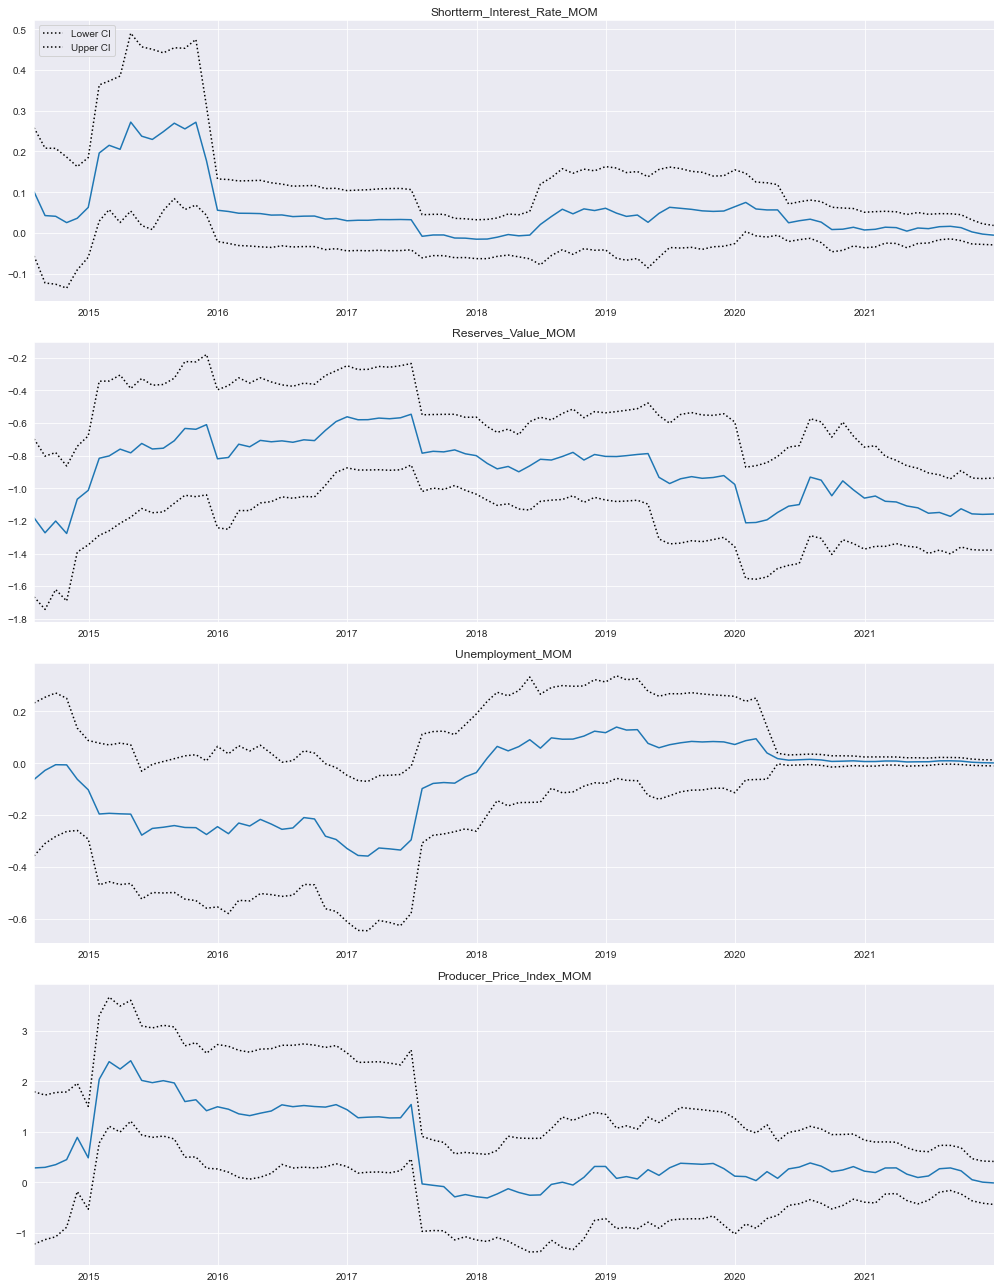

In [613]:
#Plot the variables to decide if the beta is robust over time or not:

exog_vars = ["Shortterm_Interest_Rate_MOM", "Reserves_Value_MOM", "Unemployment_MOM","Producer_Price_Index_MOM"]
exog = sm.add_constant(Macro_Change[exog_vars])
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
fig = rres.plot_recursive_coefficient(variables=exog_vars, figsize=(14, 18))
#plt.savefig('RollingRegression_CHF_USD.png')

# OLS-Model for SEK variable

In [614]:
# Loop for SEK

#x1 using all the variables since there is no perfect correlation which can be found in the chart Visualization Check for Correlation
#x2 excluding one variable from the entire model which has the highest P-Value when considering the model with all variables: Trade Balance  
#x3 excluding one varibale from the entire model which has the second highest P-Value when considering the model with all variables: Money Supplied M1
#x4 excluding one variable form the entire model which has the highest standard error when considerning the model with all variables: CPI 
#x5: excluding all the variables from entire Model which are not significat at alpha 0.1 - P-Value higher 0.1: M1, Trade Balance, Unemployment, CPI, PPI, Retail Sales

y=FX_Change [['SEK_USD_Spot_MOM']]
x1=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x2=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 'Unemployment_MOM', 
                 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x3=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Reserves_Value_MOM','Trade_Balance_Value_MOM', 'Unemployment_MOM', 
                 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x4=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x5=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM','Reserves_Value_MOM']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       SEK_USD_Spot_MOM   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     17.42
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.93e-18
Time:                        12:22:22   Log-Likelihood:                 319.96
No. Observations:                 119   AIC:                            -617.9
Df Residuals:                     108   BIC:                            -587.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [615]:
#Extract the Betas & T-Value of the most promising model choosen based on R2 adjusted: Model x5
y = FX_Change['SEK_USD_Spot_MOM']
x = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM','Reserves_Value_MOM']]
x= sm.add_constant(x)
model = sm.OLS(y,x, missing='drop')
results =model.fit()
OLS_results_SEK_P = pd.DataFrame(results.params)
OLS_results_SEK_T = pd.DataFrame(results.tvalues)
OLS_results_SEK = pd.concat([OLS_results_SEK_P, OLS_results_SEK_T], axis=1)
OLS_results_SEK['Currency'] = 'SEK_USD'
OLS_results_SEK.columns = ['Beta', 'T_Value', 'Currency']
OLS_results_SEK=OLS_results_SEK.drop(['const'])



# Multicollinearity VIF-Calculation

In [616]:
#Calculating VIF values using that function
vif_cal(input_data = mergeddata_macroandFX_change[['SEK_USD_Spot_MOM',
                                    'Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM','Reserves_Value_MOM']], 
                                    dependent_col='SEK_USD_Spot_MOM')

Shortterm_Interest_Rate_MOM  VIF =  1.09
Longterm_Interest_Rate_MOM  VIF =  1.23
Stockmarket_MOM  VIF =  1.23
Reserves_Value_MOM  VIF =  1.06


# Chow-test for most promising SEK-model

In [617]:
# Most promising model choosen based on R2 adjusted: Model x5 
# Running the Chow-Test:

Y = FX_Change['SEK_USD_Spot_MOM']
X = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM','Reserves_Value_MOM']]

# Model for the first 5 years
Y_1 = FX_Change['SEK_USD_Spot_MOM'][:60]
X_1 = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM','Reserves_Value_MOM']][:60]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = FX_Change['SEK_USD_Spot_MOM'][60:]
X_2 = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM','Reserves_Value_MOM']][60:]

X_2 = sm.add_constant(X_2)

X = sm.add_constant(X)

In [618]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SEK_USD_Spot_MOM   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     23.65
Date:                Sun, 29 May 2022   Prob (F-statistic):           2.06e-11
Time:                        12:22:23   Log-Likelihood:                 162.39
No. Observations:                  60   AIC:                            -314.8
Df Residuals:                      55   BIC:                            -304.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0030      0.002      1.235      0.222      -0.002       0.008
Shortterm_Interest_Rate_MOM     0.0119      0.026      0.451      0.654      -0.041       0.065
Longterm_Interest_Rate_MOM     -0.0696      0.023     -3.036      0.004      -0.116      -0.024
Stockmarket_MOM                -0.2072      0.081     -2.567      0.013      -0.369      -0.045
Reserves_Value_MOM             -0.9841      0.116     -8.480      0.000      -1.217      -0.752
==============================================================================
Omnibus:                        3.566   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                1.817
Skew:                          -0.066   Prob(JB):                        0.403
Kurtosis:                       2.158   Cond. No.                         53.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [619]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SEK_USD_Spot_MOM   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     25.08
Date:                Sun, 29 May 2022   Prob (F-statistic):           9.03e-12
Time:                        12:22:23   Log-Likelihood:                 161.70
No. Observations:                  59   AIC:                            -313.4
Df Residuals:                      54   BIC:                            -303.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0027      0.002      1.222      0.227      -0.002       0.007
Shortterm_Interest_Rate_MOM     0.0354      0.017      2.065      0.044       0.001       0.070
Longterm_Interest_Rate_MOM     -0.0419      0.019     -2.212      0.031      -0.080      -0.004
Stockmarket_MOM                -0.0557      0.055     -1.011      0.316      -0.166       0.055
Reserves_Value_MOM             -1.4233      0.162     -8.813      0.000      -1.747      -1.099
==============================================================================
Omnibus:                        0.860   Durbin-Watson:                   2.396
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.301
Skew:                           0.086   Prob(JB):                        0.860
Kurtosis:                       3.305   Cond. No.                         76.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [620]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]
print(J,k,N1,N2)

5 5 60 59


In [621]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [622]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, (N1+N2-2*k))

0.9525070651928432

# Rolling regression for most promising SEK-model

In [623]:
# Prepare the Data for the Rolling Regression of the Betas

Macro_Change['const']=1

X= Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM','Reserves_Value_MOM','const']]

Y_SEK=FX_Change['SEK_USD_Spot_MOM']

In [624]:
endog = Y_SEK.values
exog = sm.add_constant(X)
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.describe()

,Shortterm_Interest_Rate_MOM,Longterm_Interest_Rate_MOM,Stockmarket_MOM,Reserves_Value_MOM,const
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.028445,-0.060850,-0.091141,-1.163155,0.004363
std,0.041353,0.028516,0.142781,0.247006,0.002429
min,-0.040128,-0.122028,-0.508559,-1.638146,0.000173
25%,-0.003729,-0.085999,-0.129111,-1.384296,0.002681
50%,0.022848,-0.056460,-0.028051,-1.130345,0.003675
75%,0.051076,-0.040594,0.006732,-1.001776,0.005407
max,0.145610,-0.003417,0.049717,-0.673460,0.011519


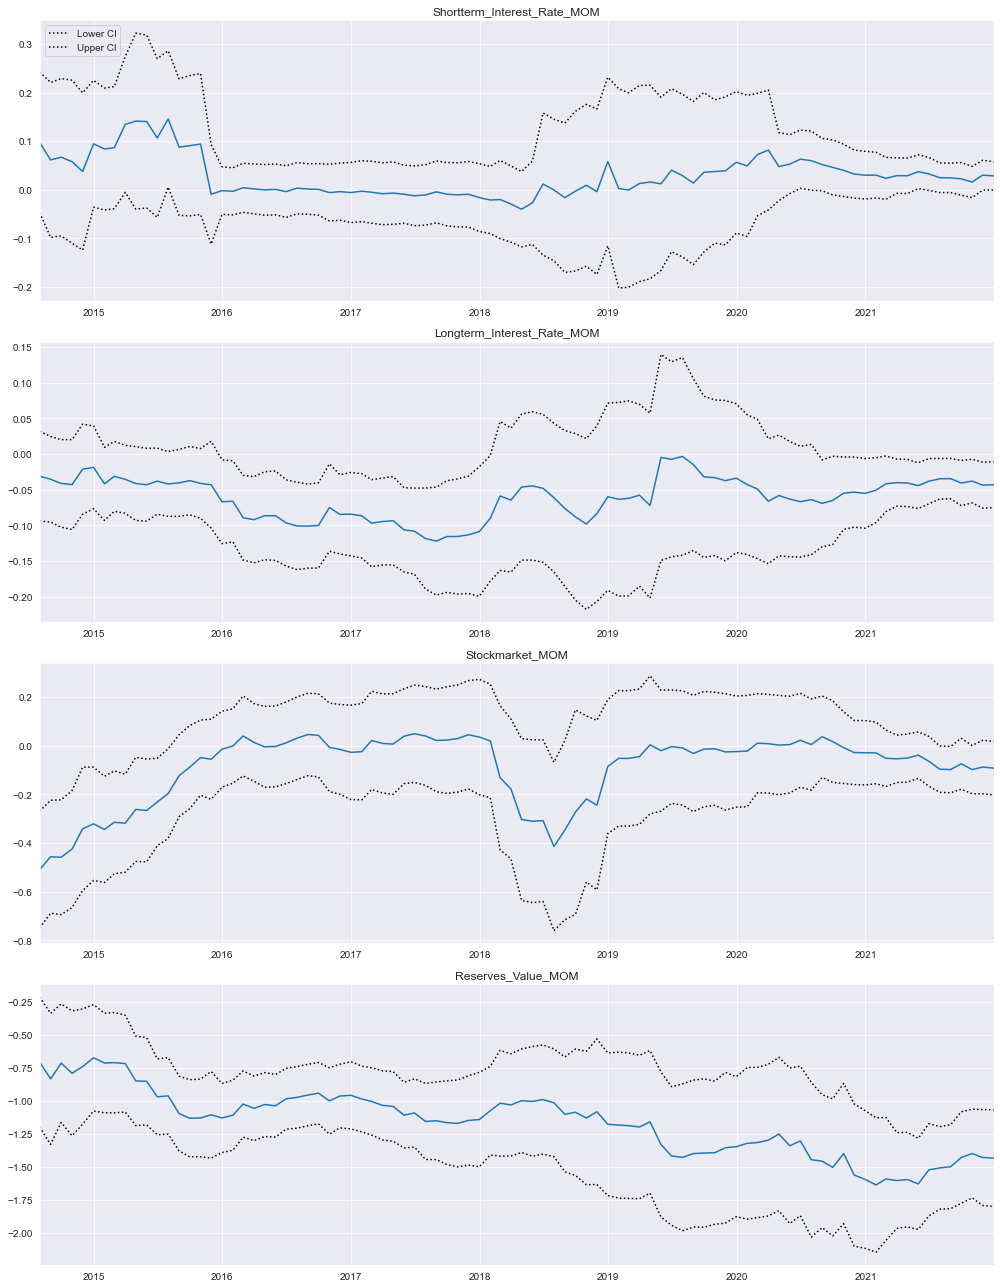

In [625]:
#Plot the variables to decide if the beta is robust over time or not:

exog_vars = ["Shortterm_Interest_Rate_MOM", "Longterm_Interest_Rate_MOM", "Stockmarket_MOM","Reserves_Value_MOM"]
exog = sm.add_constant(Macro_Change[exog_vars])
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
fig = rres.plot_recursive_coefficient(variables=exog_vars, figsize=(14, 18))
#plt.savefig('RollingRegression_SEK_USD.png')

# OLS-Model for JPY variable

In [626]:
# Loop for JPY

#x1 using all the variables since there is no perfect correlation which can be found in the chart Visualization Check for Correlation
#x2 excluding one variable from the entire model which has the highest P-Value when considering the model with all variables: Trade Balance  
#x3 excluding one varibale from the entire model which has the second highest P-Value when considering the model with all variables: Money Supplied M1
#x4 excluding one variable form the entire model which has the highest standard error when considerning the model with all variables: CPI 
#x5: excluding all the variables from entire Model which are not significat at alpha 0.1 - P-Value higher 0.1: M1, Trade Balance, Unemployment, CPI, PPI, Retail Sales

y=FX_Change [['JPY_USD_Spot_MOM']]
x1=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x2=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x3=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x4=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x5=Macro_Change[['Longterm_Interest_Rate_MOM','Stockmarket_MOM','Reserves_Value_MOM']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       JPY_USD_Spot_MOM   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     19.22
Date:                Sun, 29 May 2022   Prob (F-statistic):           7.83e-20
Time:                        12:22:28   Log-Likelihood:                 334.42
No. Observations:                 119   AIC:                            -646.8
Df Residuals:                     108   BIC:                            -616.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [627]:
#Extract the Betas & T-Value of the most promising model choosen based on R2 adjusted: Model x4
y = FX_Change['JPY_USD_Spot_MOM']
x = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]
x= sm.add_constant(x)
model = sm.OLS(y,x, missing='drop')
results =model.fit()
OLS_results_JPY_P = pd.DataFrame(results.params)
OLS_results_JPY_T = pd.DataFrame(results.tvalues)
OLS_results_JPY = pd.concat([OLS_results_JPY_P, OLS_results_JPY_T], axis=1)
OLS_results_JPY['Currency'] = 'JPY_USD'
OLS_results_JPY.columns = ['Beta', 'T_Value', 'Currency']
OLS_results_JPY=OLS_results_JPY.drop(['const'])

# Multicollinearity VIF-Calculation

In [628]:
#Calculating VIF values using that function
vif_cal(input_data = mergeddata_macroandFX_change[['JPY_USD_Spot_MOM',
                                    'Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']], 
                                    dependent_col='JPY_USD_Spot_MOM')

Shortterm_Interest_Rate_MOM  VIF =  1.7
Longterm_Interest_Rate_MOM  VIF =  1.4
Stockmarket_MOM  VIF =  1.31
Money_Supplied_M1_Value_MOM  VIF =  1.35
Reserves_Value_MOM  VIF =  1.08
Unemployment_MOM  VIF =  1.84
Producer_Price_Index_MOM  VIF =  1.67
Retail_Sales_Turnover_MOM  VIF =  1.18


# Chow-test for most promising JPY-model

In [629]:
# Most promising model choosen based on R2 adjusted: Model x4 
# Running the Chow-Test:

Y = FX_Change['JPY_USD_Spot_MOM']
X = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

# Model for the first 5 years
Y_1 = FX_Change['JPY_USD_Spot_MOM'][:60]
X_1 = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']][:60]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = FX_Change['JPY_USD_Spot_MOM'][60:]
X_2 = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']][60:]

X_2 = sm.add_constant(X_2)

X = sm.add_constant(X)

In [630]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       JPY_USD_Spot_MOM   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     16.62
Date:                Sun, 29 May 2022   Prob (F-statistic):           8.49e-12
Time:                        12:22:29   Log-Likelihood:                 162.67
No. Observations:                  60   AIC:                            -307.3
Df Residuals:                      51   BIC:                            -288.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0008      0.003      0.235      0.815      -0.006       0.008
Shortterm_Interest_Rate_MOM    -0.0345      0.029     -1.173      0.246      -0.094       0.025
Longterm_Interest_Rate_MOM      0.1069      0.026      4.045      0.000       0.054       0.160
Stockmarket_MOM                 0.2325      0.085      2.725      0.009       0.061       0.404
Money_Supplied_M1_Value_MOM    -0.1357      0.309     -0.440      0.662      -0.755       0.484
Reserves_Value_MOM             -1.0420      0.125     -8.325      0.000      -1.293      -0.791
Unemployment_MOM                0.0091      0.099      0.091      0.928      -0.190       0.209
Producer_Price_Index_MOM       -0.2704      0.443     -0.610      0.544      -1.160       0.619
Retail_Sales_Turnover_MOM       0.0060      0.028      0.216      0.830      -0.050       0.062
==============================================================================
Omnibus:                        0.439   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.575
Skew:                           0.174   Prob(JB):                        0.750
Kurtosis:                       2.670   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [631]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       JPY_USD_Spot_MOM   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     10.47
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.78e-08
Time:                        12:22:29   Log-Likelihood:                 193.88
No. Observations:                  59   AIC:                            -369.8
Df Residuals:                      50   BIC:                            -351.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0003      0.002     -0.215      0.830      -0.003       0.003
Shortterm_Interest_Rate_MOM    -0.0082      0.014     -0.578      0.566      -0.037       0.020
Longterm_Interest_Rate_MOM      0.0188      0.013      1.501      0.140      -0.006       0.044
Stockmarket_MOM                 0.1102      0.035      3.164      0.003       0.040       0.180
Money_Supplied_M1_Value_MOM     0.0016      0.005      0.300      0.766      -0.009       0.012
Reserves_Value_MOM             -0.7708      0.102     -7.532      0.000      -0.976      -0.565
Unemployment_MOM               -0.0106      0.007     -1.550      0.127      -0.024       0.003
Producer_Price_Index_MOM       -0.1863      0.256     -0.728      0.470      -0.700       0.327
Retail_Sales_Turnover_MOM       0.0046      0.016      0.286      0.776      -0.028       0.037
==============================================================================
Omnibus:                        0.402   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.557
Skew:                          -0.029   Prob(JB):                        0.757
Kurtosis:                       2.527   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [632]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]
print(J,k,N1,N2)

9 9 60 59


In [633]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [634]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, (N1+N2-2*k))

0.9931142740524396

# Rolling regression for most promising JPY-model

In [635]:
# Prepare the Data for the Rolling Regression of the Betas

Macro_Change['const']=1

X= Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM','const']]

Y_JPY=FX_Change['JPY_USD_Spot_MOM']

In [636]:
endog = Y_JPY.values
exog = sm.add_constant(X)
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.describe()

,Shortterm_Interest_Rate_MOM,Longterm_Interest_Rate_MOM,Stockmarket_MOM,Money_Supplied_M1_Value_MOM,Reserves_Value_MOM,Unemployment_MOM,Producer_Price_Index_MOM,Retail_Sales_Turnover_MOM,const
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,-0.027273,0.071703,0.158718,0.017739,-0.935013,-0.003140,-0.194089,0.016378,-0.001243
std,0.045786,0.035055,0.095905,0.278524,0.152844,0.118726,0.383360,0.023738,0.001837
min,-0.198534,0.009307,0.046082,-0.516000,-1.226522,-0.270099,-1.187041,-0.040676,-0.008495
25%,-0.033986,0.047498,0.094256,-0.111115,-1.071446,-0.105405,-0.459612,0.006234,-0.002294
50%,-0.012552,0.079740,0.128595,0.008080,-0.933547,-0.008305,-0.110898,0.013092,-0.001168
75%,-0.001970,0.097793,0.183090,0.188261,-0.828311,0.063195,0.116834,0.035281,-0.000189
max,0.048363,0.132771,0.444213,0.701929,-0.599858,0.268706,0.429559,0.057335,0.003249


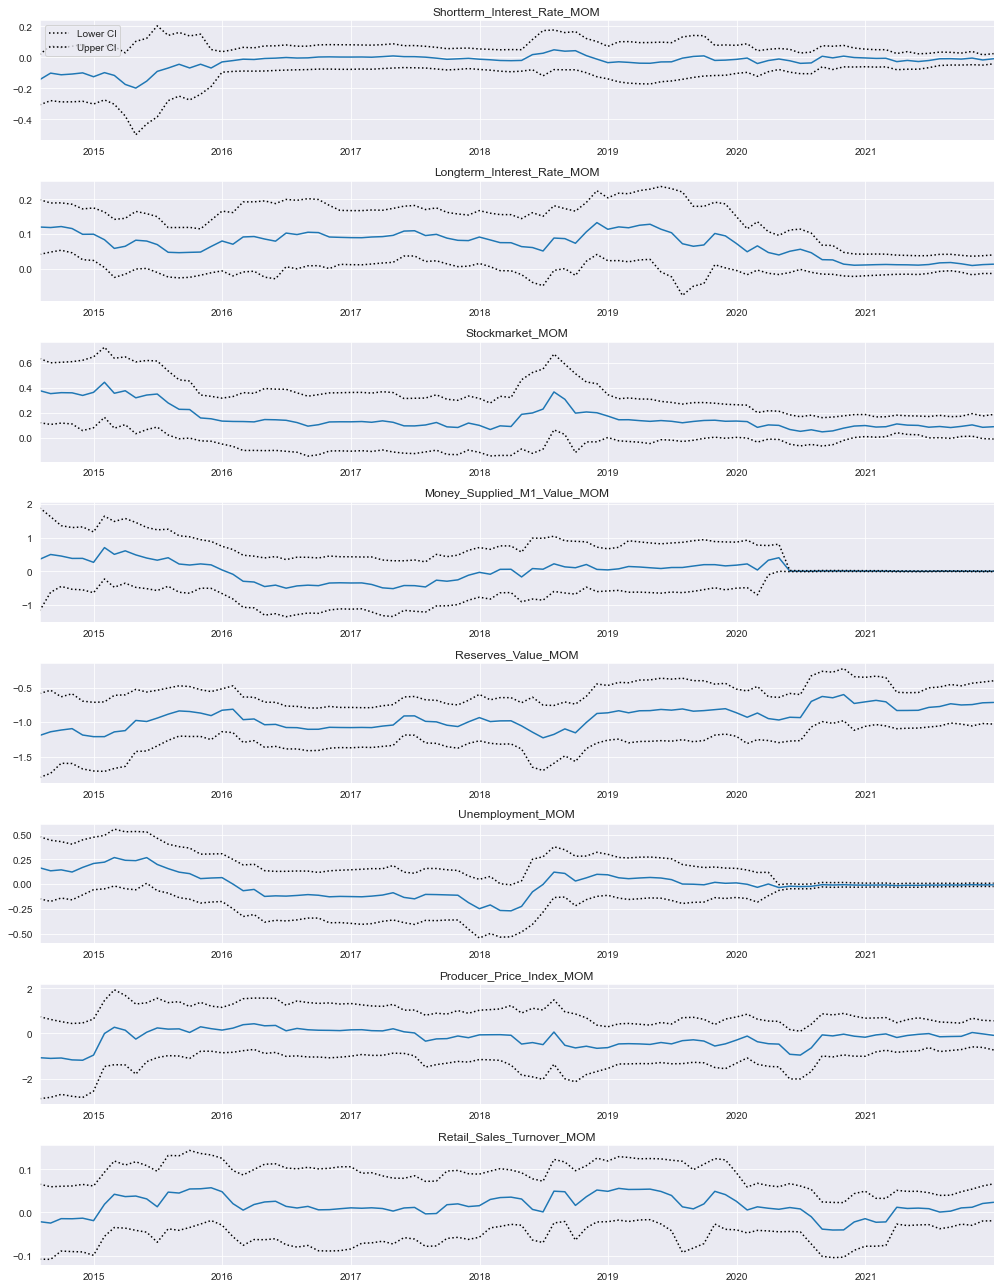

In [637]:
#Plot the variables to decide if the beta is robust over time or not:

exog_vars = ["Shortterm_Interest_Rate_MOM", "Longterm_Interest_Rate_MOM", "Stockmarket_MOM","Money_Supplied_M1_Value_MOM", "Reserves_Value_MOM","Unemployment_MOM","Producer_Price_Index_MOM","Retail_Sales_Turnover_MOM"]
exog = sm.add_constant(Macro_Change[exog_vars])
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
fig = rres.plot_recursive_coefficient(variables=exog_vars, figsize=(14, 18))
#plt.savefig('RollingRegression_JPY_USD.png')

# OLS-Model for CNY variable

In [638]:
# Loop for CNY

#x1 using all the variables since there is no perfect correlation which can be found in the chart Visualization Check for Correlation
#x2 excluding one variable from the entire model which has the highest P-Value when considering the model with all variables: Trade Balance  
#x3 excluding one varibale from the entire model which has the second highest P-Value when considering the model with all variables: Retail Sales Turnover
#x4 excluding one variable form the entire model which has the highest standard error when considerning the model with all variables: CPI 
#x5: excluding all the variables from entire Model which are not significat at alpha 0.1 - P-Value higher 0.1: Trade Balance, Unemployment, CPI, PPI, Retail Sales

y=FX_Change [['CNY_USD_Spot_MOM']]
x1=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x2=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x3=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM']]

x4=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]
               
x5=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       CNY_USD_Spot_MOM   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3.875
Date:                Sun, 29 May 2022   Prob (F-statistic):           0.000164
Time:                        12:22:34   Log-Likelihood:                 384.74
No. Observations:                 119   AIC:                            -747.5
Df Residuals:                     108   BIC:                            -716.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [639]:
#Extract the Betas & T-Value of the most promising model choosen based on R2 adjusted: Model x2
y = FX_Change['CNY_USD_Spot_MOM']
x = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]
x= sm.add_constant(x)
model = sm.OLS(y,x, missing='drop')
results =model.fit()
OLS_results_CNY_P = pd.DataFrame(results.params)
OLS_results_CNY_T = pd.DataFrame(results.tvalues)
OLS_results_CNY = pd.concat([OLS_results_CNY_P, OLS_results_CNY_T], axis=1)
OLS_results_CNY['Currency'] = 'CNY_USD'
OLS_results_CNY.columns = ['Beta', 'T_Value', 'Currency']
OLS_results_CNY=OLS_results_CNY.drop(['const'])

# Multicollinearity VIF-Calculation

In [640]:
#Calculating VIF values using that function
vif_cal(input_data = mergeddata_macroandFX_change[['CNY_USD_Spot_MOM',
                                    'Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']], 
                                    dependent_col='CNY_USD_Spot_MOM')

Shortterm_Interest_Rate_MOM  VIF =  1.72
Longterm_Interest_Rate_MOM  VIF =  1.54
Stockmarket_MOM  VIF =  1.52
Money_Supplied_M1_Value_MOM  VIF =  1.36
Reserves_Value_MOM  VIF =  1.09
Unemployment_MOM  VIF =  1.85
Consumer_Price_Index_MOM  VIF =  1.45
Producer_Price_Index_MOM  VIF =  1.91
Retail_Sales_Turnover_MOM  VIF =  1.18


# Chow-test for most promising CNY-Model

In [641]:
# Most promising model choosen based on R2 adjusted: Model x2 
# Running the Chow-Test:

Y = FX_Change['CNY_USD_Spot_MOM']
X = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

# Model for the first 5 years
Y_1 = FX_Change['CNY_USD_Spot_MOM'][:60]
X_1 = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']][:60]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = FX_Change['CNY_USD_Spot_MOM'][60:]
X_2 = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']][60:]

X_2 = sm.add_constant(X_2)

X = sm.add_constant(X)

In [642]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       CNY_USD_Spot_MOM   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     2.843
Date:                Sun, 29 May 2022   Prob (F-statistic):            0.00876
Time:                        12:22:36   Log-Likelihood:                 217.36
No. Observations:                  60   AIC:                            -414.7
Df Residuals:                      50   BIC:                            -393.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0036      0.003      1.097      0.278      -0.003       0.010
Shortterm_Interest_Rate_MOM     0.0364      0.012      3.038      0.004       0.012       0.060
Longterm_Interest_Rate_MOM      0.0039      0.011      0.361      0.720      -0.018       0.025
Stockmarket_MOM                -0.0928      0.035     -2.679      0.010      -0.162      -0.023
Money_Supplied_M1_Value_MOM    -0.0366      0.125     -0.292      0.772      -0.288       0.215
Reserves_Value_MOM             -0.0557      0.052     -1.076      0.287      -0.160       0.048
Unemployment_MOM               -0.0291      0.040     -0.722      0.474      -0.110       0.052
Consumer_Price_Index_MOM       -1.2243      1.855     -0.660      0.512      -4.950       2.501
Producer_Price_Index_MOM        0.0078      0.181      0.043      0.966      -0.356       0.372
Retail_Sales_Turnover_MOM      -0.0044      0.011     -0.385      0.702      -0.027       0.018
==============================================================================
Omnibus:                        4.289   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                3.331
Skew:                           0.527   Prob(JB):                        0.189
Kurtosis:                       3.469   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [643]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       CNY_USD_Spot_MOM   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     3.728
Date:                Sun, 29 May 2022   Prob (F-statistic):            0.00126
Time:                        12:22:36   Log-Likelihood:                 185.79
No. Observations:                  59   AIC:                            -351.6
Df Residuals:                      49   BIC:                            -330.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0012      0.002      0.475      0.637      -0.004       0.006
Shortterm_Interest_Rate_MOM    -0.0019      0.017     -0.118      0.907      -0.035       0.031
Longterm_Interest_Rate_MOM     -0.0391      0.016     -2.480      0.017      -0.071      -0.007
Stockmarket_MOM                -0.0205      0.043     -0.483      0.632      -0.106       0.065
Money_Supplied_M1_Value_MOM     0.0012      0.006      0.185      0.854      -0.012       0.014
Reserves_Value_MOM             -0.5027      0.119     -4.237      0.000      -0.741      -0.264
Unemployment_MOM               -0.0006      0.008     -0.079      0.938      -0.017       0.016
Consumer_Price_Index_MOM       -1.2661      0.970     -1.305      0.198      -3.216       0.684
Producer_Price_Index_MOM        0.1411      0.319      0.442      0.660      -0.500       0.782
Retail_Sales_Turnover_MOM       0.0247      0.019      1.330      0.190      -0.013       0.062
==============================================================================
Omnibus:                       17.020   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.120
Skew:                           1.115   Prob(JB):                     1.57e-05
Kurtosis:                       5.006   Cond. No.                         661.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [644]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]
print(J,k,N1,N2)

10 10 60 59


In [645]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [646]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, (N1+N2-2*k))

0.9766008744630128

# Rolling regression for most promising CNY-model

In [647]:
# Prepare the Data for the Rolling Regression of the Betas

Macro_Change['const']=1

X= Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM','const']]

Y_CNY=FX_Change['CNY_USD_Spot_MOM']

In [648]:
endog = Y_CNY.values
exog = sm.add_constant(X)
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.describe()

,Shortterm_Interest_Rate_MOM,Longterm_Interest_Rate_MOM,Stockmarket_MOM,Money_Supplied_M1_Value_MOM,Reserves_Value_MOM,Unemployment_MOM,Consumer_Price_Index_MOM,Producer_Price_Index_MOM,Retail_Sales_Turnover_MOM,const
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.014226,-0.021130,-0.087303,-0.027727,-0.268248,0.000149,-3.216481,0.190248,-0.002501,0.006973
std,0.030019,0.035220,0.059172,0.119223,0.275879,0.044834,3.774573,0.252509,0.027875,0.007358
min,-0.099423,-0.137520,-0.238894,-0.410992,-0.659956,-0.116114,-11.574692,-0.274296,-0.085725,-0.005399
25%,-0.003648,-0.041066,-0.131437,-0.081222,-0.527368,-0.021166,-5.487679,0.044044,-0.016015,-0.000008
50%,0.024763,-0.015716,-0.074926,0.000756,-0.355367,0.004966,-2.757333,0.155819,-0.005524,0.006542
75%,0.032015,0.002999,-0.040217,0.030644,0.029905,0.017438,-0.081427,0.339650,0.009963,0.013656
max,0.066313,0.036847,0.021820,0.232820,0.188194,0.163649,2.324614,0.727659,0.055054,0.022288


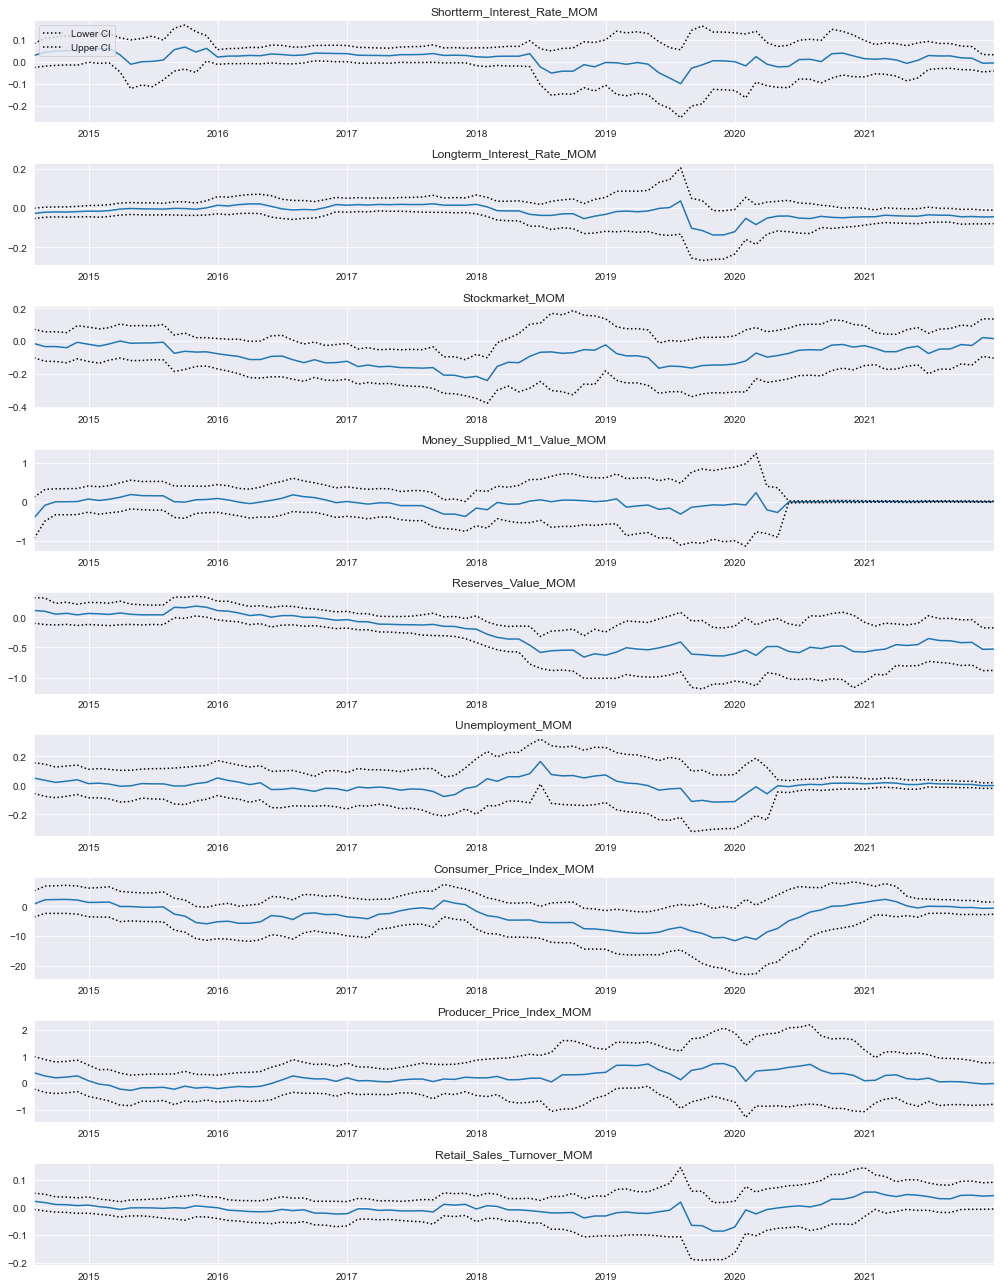

In [649]:
#Plot the variables to decide if the beta is robust over time or not:

exog_vars = ["Shortterm_Interest_Rate_MOM", "Longterm_Interest_Rate_MOM", "Stockmarket_MOM","Money_Supplied_M1_Value_MOM", "Reserves_Value_MOM", "Unemployment_MOM", "Consumer_Price_Index_MOM","Producer_Price_Index_MOM", "Retail_Sales_Turnover_MOM"]
exog = sm.add_constant(Macro_Change[exog_vars])
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
fig = rres.plot_recursive_coefficient(variables=exog_vars, figsize=(14, 18))
#plt.savefig('RollingRegression_CNY_USD.png')

# OLS-Model for GBP variable

In [650]:
# Loop for GBP

#x1 using all the variables since there is no perfect correlation which can be found in the chart Visualization Check for Correlation
#x2 excluding one variable from the entire model which has the highest P-Value when considering the model with all variables: Retail Sales,  
#x3 excluding one varibale from the entire model which has the second highest P-Value when considering the model with all variables: CPI
#x4 excluding one variable form the entire model which has the highest standard error when considerning the model with all variables: PPI 
#x5: excluding all the variables from entire Model which are not significat at alpha 0.1 - P-Value higher 0.1: Trade Balance, Unemploymennt, CPI, PPI, Retail Sales

y=FX_Change [['GBP_USD_Spot_MOM']]
x1=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x2=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM']]

x3=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x4=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]
               
x5=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       GBP_USD_Spot_MOM   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     9.530
Date:                Sun, 29 May 2022   Prob (F-statistic):           3.26e-11
Time:                        12:22:43   Log-Likelihood:                 316.31
No. Observations:                 119   AIC:                            -610.6
Df Residuals:                     108   BIC:                            -580.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [651]:
#Extract the Betas & T-Value of the most promising model choosen based on R2 adjusted: Model x2
y = FX_Change['GBP_USD_Spot_MOM']
x = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM']]
x= sm.add_constant(x)
model = sm.OLS(y,x, missing='drop')
results =model.fit()
OLS_results_GBP_P = pd.DataFrame(results.params)
OLS_results_GBP_T = pd.DataFrame(results.tvalues)
OLS_results_GBP = pd.concat([OLS_results_GBP_P, OLS_results_GBP_T], axis=1)
OLS_results_GBP['Currency'] = 'GBP_USD'
OLS_results_GBP.columns = ['Beta', 'T_Value', 'Currency']
OLS_results_GBP=OLS_results_GBP.drop(['const'])

# Multicollinearity VIF-Calculation

In [652]:
#Calculating VIF values using that function
vif_cal(input_data = mergeddata_macroandFX_change[['GBP_USD_Spot_MOM',
                                    'Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM']], 
                                    dependent_col='GBP_USD_Spot_MOM')

Shortterm_Interest_Rate_MOM  VIF =  1.67
Longterm_Interest_Rate_MOM  VIF =  1.54
Stockmarket_MOM  VIF =  1.57
Money_Supplied_M1_Value_MOM  VIF =  1.25
Reserves_Value_MOM  VIF =  1.09
Trade_Balance_Value_MOM  VIF =  1.12
Unemployment_MOM  VIF =  2.01
Consumer_Price_Index_MOM  VIF =  1.46
Producer_Price_Index_MOM  VIF =  1.96


# Chow-test for most promising GBP-model

In [653]:
# Most promising model choosen based on R2 adjusted: Model x2 
# Running the Chow-Test:

Y = FX_Change['GBP_USD_Spot_MOM']
X = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM']]

# Model for the first 5 years
Y_1 = FX_Change['GBP_USD_Spot_MOM'][:60]
X_1 = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM']][:60]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = FX_Change['GBP_USD_Spot_MOM'][60:]
X_2 = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM']][60:]

X_2 = sm.add_constant(X_2)

X = sm.add_constant(X)

In [654]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       GBP_USD_Spot_MOM   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     5.695
Date:                Sun, 29 May 2022   Prob (F-statistic):           2.09e-05
Time:                        12:22:46   Log-Likelihood:                 160.49
No. Observations:                  60   AIC:                            -301.0
Df Residuals:                      50   BIC:                            -280.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0095      0.008     -1.139      0.260      -0.026       0.007
Shortterm_Interest_Rate_MOM    -0.0557      0.030     -1.860      0.069      -0.116       0.004
Longterm_Interest_Rate_MOM      0.0825      0.027      3.015      0.004       0.028       0.138
Stockmarket_MOM                 0.2321      0.090      2.579      0.013       0.051       0.413
Money_Supplied_M1_Value_MOM     0.6092      0.325      1.874      0.067      -0.044       1.262
Reserves_Value_MOM              0.4606      0.134      3.443      0.001       0.192       0.729
Trade_Balance_Value_MOM        -0.0608      0.039     -1.574      0.122      -0.138       0.017
Unemployment_MOM               -0.1463      0.105     -1.389      0.171      -0.358       0.065
Consumer_Price_Index_MOM        0.1704      4.787      0.036      0.972      -9.444       9.785
Producer_Price_Index_MOM       -0.7956      0.479     -1.663      0.103      -1.757       0.166
==============================================================================
Omnibus:                       10.376   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.975
Skew:                          -0.714   Prob(JB):                      0.00251
Kurtosis:                       4.659   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [655]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       GBP_USD_Spot_MOM   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     8.505
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.60e-07
Time:                        12:22:46   Log-Likelihood:                 167.86
No. Observations:                  59   AIC:                            -315.7
Df Residuals:                      49   BIC:                            -295.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0002      0.003     -0.060      0.952      -0.007       0.007
Shortterm_Interest_Rate_MOM    -0.0289      0.023     -1.256      0.215      -0.075       0.017
Longterm_Interest_Rate_MOM      0.0419      0.021      1.964      0.055      -0.001       0.085
Stockmarket_MOM                 0.1649      0.059      2.805      0.007       0.047       0.283
Money_Supplied_M1_Value_MOM    -0.0212      0.008     -2.527      0.015      -0.038      -0.004
Reserves_Value_MOM              0.9482      0.162      5.838      0.000       0.622       1.275
Trade_Balance_Value_MOM         0.0170      0.042      0.405      0.687      -0.067       0.101
Unemployment_MOM               -0.0054      0.012     -0.446      0.658      -0.030       0.019
Consumer_Price_Index_MOM       -0.5275      1.315     -0.401      0.690      -3.170       2.115
Producer_Price_Index_MOM        0.2921      0.433      0.675      0.503      -0.577       1.161
==============================================================================
Omnibus:                        1.851   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.346
Skew:                           0.366   Prob(JB):                        0.510
Kurtosis:                       3.101   Cond. No.                         661.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [656]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]
print(J,k,N1,N2)

10 10 60 59


In [657]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [658]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, (N1+N2-2*k))

0.9647038086737725

# Rolling regression for most promising GBP-model

In [659]:
# Prepare the Data for the Rolling Regression of the Betas

Macro_Change['const']=1

X= Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM','const']]

Y_GBP=FX_Change['GBP_USD_Spot_MOM']

In [660]:
endog = Y_GBP.values
exog = sm.add_constant(X)
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.describe()

,Shortterm_Interest_Rate_MOM,Longterm_Interest_Rate_MOM,Stockmarket_MOM,Money_Supplied_M1_Value_MOM,Reserves_Value_MOM,Trade_Balance_Value_MOM,Unemployment_MOM,Consumer_Price_Index_MOM,Producer_Price_Index_MOM,const
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,-0.020253,0.095315,0.160804,0.178897,0.835237,-0.052517,-0.110796,-1.072566,-0.051702,-0.002544
std,0.047705,0.065026,0.118767,0.342438,0.323126,0.060288,0.104058,3.028888,0.622665,0.008086
min,-0.100489,0.008132,-0.133315,-0.580436,0.214264,-0.195429,-0.433885,-8.454898,-1.428961,-0.022759
25%,-0.050965,0.027088,0.106668,-0.028137,0.606726,-0.079419,-0.146961,-2.692501,-0.524676,-0.008816
50%,-0.030453,0.095859,0.161579,0.072768,0.878582,-0.054253,-0.106195,-1.378333,0.144650,-0.000685
75%,0.007678,0.150128,0.243615,0.444922,1.066519,-0.036452,-0.023172,0.291944,0.383875,0.003221
max,0.110934,0.219141,0.376831,0.832934,1.483708,0.131755,0.027033,7.890199,1.006594,0.016037


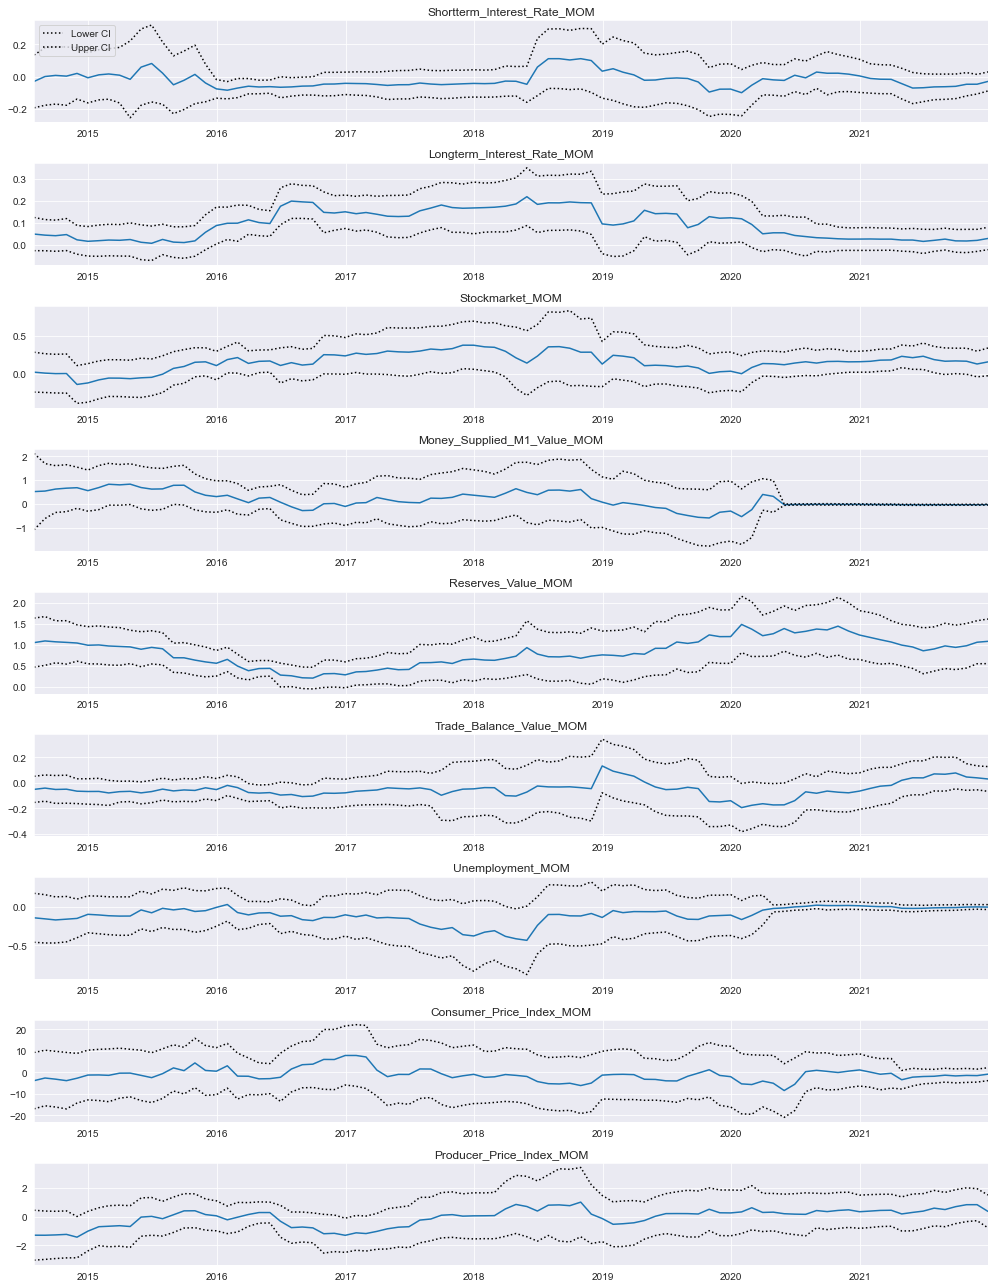

In [661]:
#Plot the variables to decide if the beta is robust over time or not:

exog_vars = ["Shortterm_Interest_Rate_MOM", "Longterm_Interest_Rate_MOM", "Stockmarket_MOM","Money_Supplied_M1_Value_MOM", "Reserves_Value_MOM", "Trade_Balance_Value_MOM", "Unemployment_MOM", "Consumer_Price_Index_MOM", "Producer_Price_Index_MOM"]
exog = sm.add_constant(Macro_Change[exog_vars])
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
fig = rres.plot_recursive_coefficient(variables=exog_vars, figsize=(14, 18))
#plt.savefig('RollingRegression_GBP_USD.png')

# OLS-Model for HKD variable

In [662]:
# Loop for HKD

#x1 using all the variables since there is no perfect correlation which can be found in the chart Visualization Check for Correlation
#x2 excluding one variable from the entire model which has the highest P-Value when considering the model with all variables: M1
#x3 excluding one varibale from the entire model which has the second highest P-Value when considering the model with all variables: Trade Balance
#x4 excluding one variable form the entire model which has the highest standard error when considerning the model with all variables: CPI 
#x5: There is no significant parameters in the entire model, therefore exclude M1, Trade Balance, CPI

y=FX_Change [['HKD_USD_Spot_MOM']]
x1=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x2=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM', 'Reserves_Value_MOM', 
                 'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x3=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x4=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]
               
x5=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM','Reserves_Value_MOM', 
                 'Unemployment_MOM', 'Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       HKD_USD_Spot_MOM   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.7561
Date:                Sun, 29 May 2022   Prob (F-statistic):              0.670
Time:                        12:22:54   Log-Likelihood:                 622.86
No. Observations:                 119   AIC:                            -1224.
Df Residuals:                     108   BIC:                            -1193.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [663]:
#There is no promising model for this currency

# OLS-Model for SGD variable

In [664]:
# Loop for SGD

#x1 using all the variables since there is no perfect correlation which can be found in the chart Visualization Check for Correlation
#x2 excluding one variable from the entire model which has the highest P-Value when considering the model with all variables: Longterm Interest Rates  
#x3 excluding one varibale from the entire model which has the second highest P-Value when considering the model with all variables: PPI
#x4 excluding one variable form the entire model which has the highest standard error when considerning the model with all variables: CPI 
#x5: excluding all the variables from entire Model which are not significat at alpha 0.1 - P-Value higher 0.1: Shortterm Interest Rates, Longterm Interest Rates, M1, Trade Balance, Unemployment Rate, CPI, PPI, Retail Sales

y=FX_Change [['SGD_USD_Spot_MOM']]
x1=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x2=Macro_Change[['Shortterm_Interest_Rate_MOM', 'Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 'Unemployment_MOM', 
                 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x3=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Reserves_Value_MOM','Trade_Balance_Value_MOM', 'Unemployment_MOM', 
                 'Consumer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x4=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x5=Macro_Change[['Stockmarket_MOM', 'Reserves_Value_MOM']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       SGD_USD_Spot_MOM   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     17.94
Date:                Sun, 29 May 2022   Prob (F-statistic):           7.52e-19
Time:                        12:22:55   Log-Likelihood:                 401.85
No. Observations:                 119   AIC:                            -781.7
Df Residuals:                     108   BIC:                            -751.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [665]:
#Extract the Betas & T-Value of the most promising model choosen based on R2 adjusted: Model x5
y = FX_Change['SGD_USD_Spot_MOM']
x = Macro_Change[['Stockmarket_MOM', 'Reserves_Value_MOM']]
x= sm.add_constant(x)
model = sm.OLS(y,x, missing='drop')
results =model.fit()
OLS_results_SGD_P = pd.DataFrame(results.params)
OLS_results_SGD_T = pd.DataFrame(results.tvalues)
OLS_results_SGD = pd.concat([OLS_results_SGD_P, OLS_results_SGD_T], axis=1)
OLS_results_SGD['Currency'] = 'SGD_USD'
OLS_results_SGD.columns = ['Beta', 'T_Value', 'Currency']
OLS_results_SGD=OLS_results_SGD.drop(['const'])

# Multicollinearity VIF-Calculation

In [666]:
#Calculating VIF values using that function
vif_cal(input_data = mergeddata_macroandFX_change[['SGD_USD_Spot_MOM',
                                    'Stockmarket_MOM', 'Reserves_Value_MOM']], 
                                    dependent_col='SGD_USD_Spot_MOM')

Stockmarket_MOM  VIF =  1.01
Reserves_Value_MOM  VIF =  1.01


# Chow-test for most promising SGD-model

In [667]:
# Most promising model choosen based on R2 adjusted: Model x5 
# Running the Chow-Test:

Y = FX_Change['SGD_USD_Spot_MOM']
X = Macro_Change[['Stockmarket_MOM', 'Reserves_Value_MOM']]

# Model for the first 5 years
Y_1 = FX_Change['SGD_USD_Spot_MOM'][:60]
X_1 = Macro_Change[['Stockmarket_MOM', 'Reserves_Value_MOM']][:60]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = FX_Change['SGD_USD_Spot_MOM'][60:]
X_2 = Macro_Change[['Stockmarket_MOM', 'Reserves_Value_MOM']][60:]

X_2 = sm.add_constant(X_2)

X = sm.add_constant(X)

In [668]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SGD_USD_Spot_MOM   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     40.02
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.39e-11
Time:                        12:22:56   Log-Likelihood:                 190.83
No. Observations:                  60   AIC:                            -375.7
Df Residuals:                      57   BIC:                            -369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0016      0.001      1.108      0.272      -0.001       0.004
Stockmarket_MOM       -0.1882      0.046     -4.132      0.000      -0.279      -0.097
Reserves_Value_MOM    -0.5325      0.070     -7.643      0.000      -0.672      -0.393
==============================================================================
Omnibus:                        0.695   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.706   Jarque-Bera (JB):                0.799
Skew:                           0.151   Prob(JB):                        0.671
Kurtosis:                       2.523   Cond. No.                         52.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [669]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SGD_USD_Spot_MOM   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.63
Date:                Sun, 29 May 2022   Prob (F-statistic):           2.56e-14
Time:                        12:22:56   Log-Likelihood:                 216.70
No. Observations:                  59   AIC:                            -427.4
Df Residuals:                      56   BIC:                            -421.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0010      0.001      1.124      0.266      -0.001       0.003
Stockmarket_MOM       -0.1095      0.019     -5.845      0.000      -0.147      -0.072
Reserves_Value_MOM    -0.4716      0.059     -7.963      0.000      -0.590      -0.353
==============================================================================
Omnibus:                        1.841   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.503
Skew:                           0.223   Prob(JB):                        0.472
Kurtosis:                       2.358   Cond. No.                         72.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [670]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]
print(J,k,N1,N2)

3 3 60 59


In [671]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [672]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, (N1+N2-2*k))

0.6906321842525827

# Rolling regression for most promising SGD-model

In [673]:
# Prepare the Data for the Rolling Regression of the Betas

Macro_Change['const']=1

X= Macro_Change[['Stockmarket_MOM', 'Reserves_Value_MOM', 'const']]

Y_SGD=FX_Change['SGD_USD_Spot_MOM']

In [674]:
endog = Y_SGD.values
exog = sm.add_constant(X)
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.tail()

,Stockmarket_MOM,Reserves_Value_MOM,const
115,-0.127242,-0.471029,0.002518
116,-0.121101,-0.426025,0.002022
117,-0.122428,-0.421958,0.001910
118,-0.118924,-0.435818,0.001857
119,-0.120991,-0.426040,0.001698


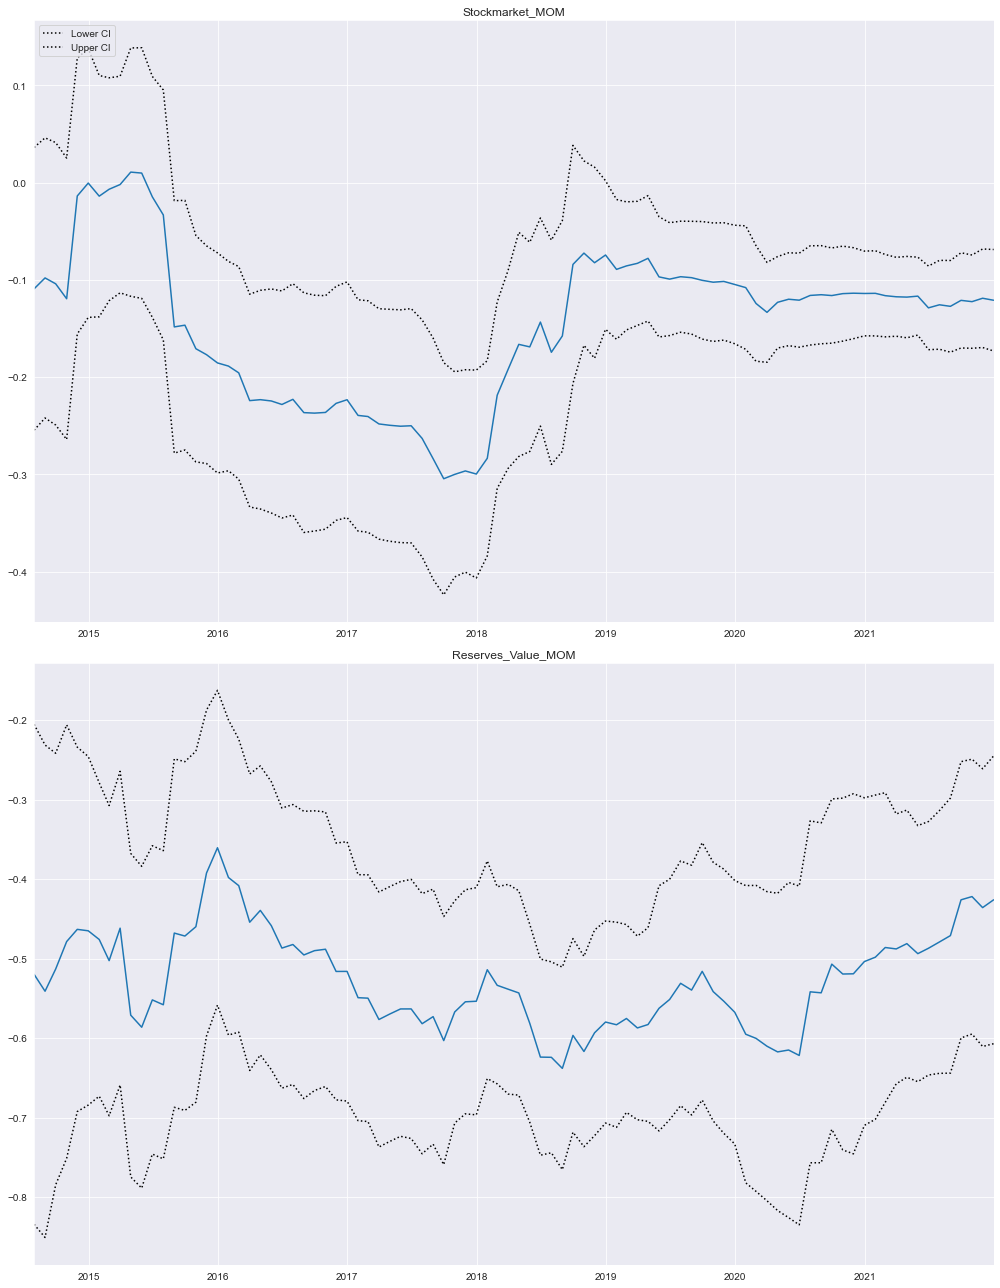

In [675]:
#Plot the variables to decide if the beta is robust over time or not:

exog_vars = ["Stockmarket_MOM", "Reserves_Value_MOM" ]
exog = sm.add_constant(Macro_Change[exog_vars])
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
fig = rres.plot_recursive_coefficient(variables=exog_vars, figsize=(14, 18))
#plt.savefig('RollingRegression_SGD_USD.png')

# OLS-Model for CAD variable

In [676]:
# Loop for CAD

#x1 using all the variables since there is no perfect correlation which can be found in the chart Visualization Check for Correlation
#x2 excluding one variable from the entire model which has the highest P-Value when considering the model with all variables: Trade Balance  
#x3 excluding one varibale from the entire model which has the second highest P-Value when considering the model with all variables: Money Supplied M1
#x4 excluding one variable form the entire model which has the highest standard error when considerning the model with all variables: CPI 
#x5: excluding all the variables from entire Model which are not significat at alpha 0.1 - P-Value higher 0.1: M1, Trade Balance, CPI, PPI, Retail Sales

y=FX_Change [['CAD_USD_Spot_MOM']]
x1=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x2=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x3=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x4=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x5=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM',  
                    'Unemployment_MOM']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       CAD_USD_Spot_MOM   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     15.24
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.19e-16
Time:                        12:22:59   Log-Likelihood:                 335.74
No. Observations:                 119   AIC:                            -649.5
Df Residuals:                     108   BIC:                            -618.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [677]:
#Extract the Betas & T-Value of the most promising model choosen based on R2 adjusted: Model x3
Y = FX_Change['CAD_USD_Spot_MOM']
X = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]
x= sm.add_constant(x)
model = sm.OLS(y,x, missing='drop')
results =model.fit()
OLS_results_CAD_P = pd.DataFrame(results.params)
OLS_results_CAD_T = pd.DataFrame(results.tvalues)
OLS_results_CAD = pd.concat([OLS_results_CAD_P, OLS_results_CAD_T], axis=1)
OLS_results_CAD['Currency'] = 'CAD_USD'
OLS_results_CAD.columns = ['Beta', 'T_Value', 'Currency']
OLS_results_CAD=OLS_results_CAD.drop(['const'])


# Multicollinearity VIF-Calculation

In [678]:
#Calculating VIF values using that function
vif_cal(input_data = mergeddata_macroandFX_change[['CAD_USD_Spot_MOM',
                                    'Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']], 
                                    dependent_col='CAD_USD_Spot_MOM')

Shortterm_Interest_Rate_MOM  VIF =  1.52
Longterm_Interest_Rate_MOM  VIF =  1.53
Stockmarket_MOM  VIF =  1.56
Reserves_Value_MOM  VIF =  1.09
Trade_Balance_Value_MOM  VIF =  1.11
Unemployment_MOM  VIF =  1.99
Consumer_Price_Index_MOM  VIF =  1.44
Producer_Price_Index_MOM  VIF =  1.91
Retail_Sales_Turnover_MOM  VIF =  1.08


# Chow-test for most promising CAD-model

In [679]:
# Most promising model choosen based on R2 adjusted: Model x3 
# Running the Chow-Test:

Y = FX_Change['CAD_USD_Spot_MOM']
X = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

# Model for the first 5 years
Y_1 = FX_Change['CAD_USD_Spot_MOM'][:60]
X_1 = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']][:60]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = FX_Change['CAD_USD_Spot_MOM'][60:]
X_2 = Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']][60:]

X_2 = sm.add_constant(X_2)

X = sm.add_constant(X)

In [680]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       CAD_USD_Spot_MOM   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     9.451
Date:                Sun, 29 May 2022   Prob (F-statistic):           3.16e-08
Time:                        12:23:01   Log-Likelihood:                 167.02
No. Observations:                  60   AIC:                            -314.0
Df Residuals:                      50   BIC:                            -293.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0143      0.007      1.960      0.056      -0.000       0.029
Shortterm_Interest_Rate_MOM     0.0742      0.028      2.671      0.010       0.018       0.130
Longterm_Interest_Rate_MOM     -0.0421      0.024     -1.729      0.090      -0.091       0.007
Stockmarket_MOM                -0.2949      0.082     -3.602      0.001      -0.459      -0.130
Reserves_Value_MOM             -0.7639      0.120     -6.346      0.000      -1.006      -0.522
Trade_Balance_Value_MOM        -0.0119      0.034     -0.347      0.730      -0.081       0.057
Unemployment_MOM               -0.0367      0.095     -0.388      0.700      -0.227       0.153
Consumer_Price_Index_MOM       -6.8403      4.293     -1.593      0.117     -15.463       1.783
Producer_Price_Index_MOM        0.5957      0.428      1.393      0.170      -0.263       1.455
Retail_Sales_Turnover_MOM      -0.0349      0.026     -1.338      0.187      -0.087       0.017
==============================================================================
Omnibus:                        3.771   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.132
Skew:                           0.555   Prob(JB):                        0.209
Kurtosis:                       3.140   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [681]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       CAD_USD_Spot_MOM   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     9.050
Date:                Sun, 29 May 2022   Prob (F-statistic):           6.77e-08
Time:                        12:23:01   Log-Likelihood:                 177.35
No. Observations:                  59   AIC:                            -334.7
Df Residuals:                      49   BIC:                            -313.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0024      0.003      0.864      0.392      -0.003       0.008
Shortterm_Interest_Rate_MOM     0.0273      0.018      1.534      0.132      -0.008       0.063
Longterm_Interest_Rate_MOM     -0.0658      0.018     -3.678      0.001      -0.102      -0.030
Stockmarket_MOM                -0.1868      0.050     -3.769      0.000      -0.286      -0.087
Reserves_Value_MOM             -0.4917      0.139     -3.545      0.001      -0.770      -0.213
Trade_Balance_Value_MOM         0.0563      0.035      1.604      0.115      -0.014       0.127
Unemployment_MOM                0.0143      0.010      1.430      0.159      -0.006       0.034
Consumer_Price_Index_MOM       -0.9014      1.059     -0.851      0.399      -3.029       1.226
Producer_Price_Index_MOM        0.6637      0.363      1.829      0.074      -0.066       1.393
Retail_Sales_Turnover_MOM      -0.0208      0.020     -1.031      0.308      -0.062       0.020
==============================================================================
Omnibus:                        4.595   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.759
Skew:                          -0.250   Prob(JB):                       0.0926
Kurtosis:                       4.298   Cond. No.                         623.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [682]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]
print(J,k,N1,N2)

10 10 60 59


In [683]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [684]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, (N1+N2-2*k))

0.7697426926441204

# Rolling regression for most promising CAD-model

In [685]:
# Prepare the Data for the Rolling Regression of the Betas

Macro_Change['const']=1

X= Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                    'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM', 'const']]

Y_CAD=FX_Change['CAD_USD_Spot_MOM']

In [686]:
endog = Y_CAD.values
exog = sm.add_constant(X)
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.describe()

,Shortterm_Interest_Rate_MOM,Longterm_Interest_Rate_MOM,Stockmarket_MOM,Reserves_Value_MOM,Trade_Balance_Value_MOM,Unemployment_MOM,Consumer_Price_Index_MOM,Producer_Price_Index_MOM,Retail_Sales_Turnover_MOM,const
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.060682,-0.073909,-0.216341,-0.728617,0.031388,0.001996,-2.092244,0.629345,-0.017012,0.004078
std,0.051964,0.050640,0.107214,0.170207,0.070804,0.093633,5.589951,0.333663,0.035783,0.010933
min,-0.106515,-0.149781,-0.449170,-1.016779,-0.066853,-0.336894,-14.312996,-0.049420,-0.103066,-0.017891
25%,0.026319,-0.115510,-0.261562,-0.875595,-0.030213,-0.060736,-6.440923,0.372311,-0.040844,-0.005392
50%,0.054758,-0.073756,-0.204235,-0.748623,0.016839,0.016790,-1.100163,0.544409,-0.019202,0.003132
75%,0.105611,-0.046169,-0.160221,-0.625092,0.070970,0.061426,1.505789,0.825764,0.006916,0.012357
max,0.174565,0.034817,0.037997,-0.355022,0.204491,0.170401,10.975219,1.485207,0.077538,0.024822


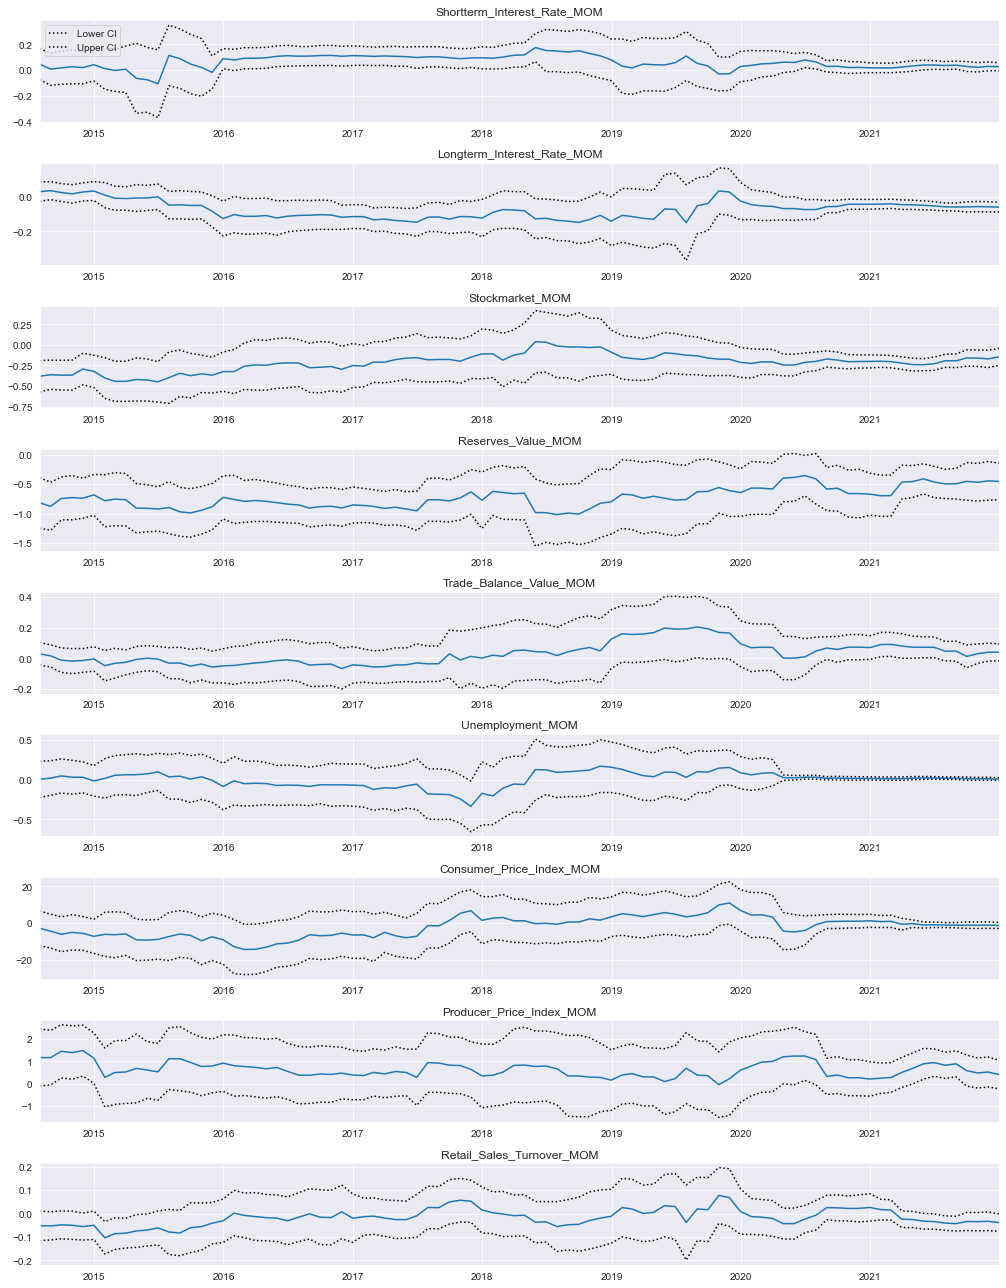

In [687]:
#Plot the variables to decide if the beta is robust over time or not:

exog_vars = ["Shortterm_Interest_Rate_MOM", "Longterm_Interest_Rate_MOM", "Stockmarket_MOM", "Reserves_Value_MOM", "Trade_Balance_Value_MOM", "Unemployment_MOM", "Consumer_Price_Index_MOM", "Producer_Price_Index_MOM", "Retail_Sales_Turnover_MOM" ]
exog = sm.add_constant(Macro_Change[exog_vars])
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
fig = rres.plot_recursive_coefficient(variables=exog_vars, figsize=(14, 18))
#plt.savefig('RollingRegression_CAD_USD.png')

# OLS-Model for AUD variable

In [688]:
# Loop for AUD

#x1 using all the variables since there is no perfect correlation which can be found in the chart Visualization Check for Correlation
#x2 excluding one variable from the entire model which has the highest P-Value when considering the model with all variables: Retail Sales  
#x3 excluding one varibale from the entire model which has the second highest P-Value when considering the model with all variables: Shortterm Interest Rates
#x4 excluding one variable form the entire model which has the highest standard error when considerning the model with all variables: CPI 
#x5: excluding all the variables from entire Model which are not significat at alpha 0.1 - P-Value higher 0.1: Shortterm Interest Rates, Lonterm Interest Rates, M1, Unemployment, CPI, PPI, Retail Sales

y=FX_Change [['AUD_USD_Spot_MOM']]
x1=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                  'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x2=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                  'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM']]

x3=Macro_Change[['Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                  'Unemployment_MOM', 'Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x4=Macro_Change[['Shortterm_Interest_Rate_MOM','Longterm_Interest_Rate_MOM','Stockmarket_MOM',
                  'Money_Supplied_M1_Value_MOM', 'Reserves_Value_MOM','Trade_Balance_Value_MOM', 
                  'Unemployment_MOM', 'Consumer_Price_Index_MOM','Producer_Price_Index_MOM', 'Retail_Sales_Turnover_MOM']]

x5=Macro_Change[[ 'Stockmarket_MOM', 'Reserves_Value_MOM', 'Trade_Balance_Value_MOM']]

x_list = [x1, x2, x3, x4, x5]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       AUD_USD_Spot_MOM   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     12.82
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.73e-14
Time:                        12:23:09   Log-Likelihood:                 299.10
No. Observations:                 119   AIC:                            -576.2
Df Residuals:                     108   BIC:                            -545.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [689]:

#Extract the Betas & T-Value of the most promising model choosen based on R2 adjusted: Model x5
y = FX_Change['AUD_USD_Spot_MOM']
x = Macro_Change[['Stockmarket_MOM', 'Reserves_Value_MOM', 'Trade_Balance_Value_MOM']]
x= sm.add_constant(x)
model = sm.OLS(y,x, missing='drop')
results =model.fit()
OLS_results_AUD_P = pd.DataFrame(results.params)
OLS_results_AUD_T = pd.DataFrame(results.tvalues)
OLS_results_AUD = pd.concat([OLS_results_AUD_P, OLS_results_AUD_T], axis=1)
OLS_results_AUD['Currency'] = 'AUD_USD'
OLS_results_AUD.columns = ['Beta', 'T_Value', 'Currency']
OLS_results_AUD=OLS_results_AUD.drop(['const'])

# Multicollinearity VIF-Calculation

In [690]:
#Calculating VIF values using that function
vif_cal(input_data = mergeddata_macroandFX_change[['AUD_USD_Spot_MOM',
                                    'Stockmarket_MOM', 'Reserves_Value_MOM', 'Trade_Balance_Value_MOM']], 
                                    dependent_col='AUD_USD_Spot_MOM')

Stockmarket_MOM  VIF =  1.02
Reserves_Value_MOM  VIF =  1.01
Trade_Balance_Value_MOM  VIF =  1.02


# Chow-test for most promising AUD-model

In [691]:
# Most promising model choosen based on R2 adjusted: Model x5 
# Running the Chow-Test:

Y = FX_Change['AUD_USD_Spot_MOM']
X = Macro_Change[['Stockmarket_MOM', 'Reserves_Value_MOM', 'Trade_Balance_Value_MOM']]

# Model for the first 5 years
Y_1 = FX_Change['AUD_USD_Spot_MOM'][:60]
X_1 = Macro_Change[['Stockmarket_MOM', 'Reserves_Value_MOM', 'Trade_Balance_Value_MOM']][:60]
X_1 = sm.add_constant(X_1)

# Model for the following 4 years
Y_2 = FX_Change['AUD_USD_Spot_MOM'][60:]
X_2 = Macro_Change[['Stockmarket_MOM', 'Reserves_Value_MOM', 'Trade_Balance_Value_MOM']][60:]

X_2 = sm.add_constant(X_2)

X = sm.add_constant(X)

In [692]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       AUD_USD_Spot_MOM   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     17.43
Date:                Sun, 29 May 2022   Prob (F-statistic):           4.10e-08
Time:                        12:23:11   Log-Likelihood:                 144.47
No. Observations:                  60   AIC:                            -280.9
Df Residuals:                      56   BIC:                            -272.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0048      0.003     -1.515      0.136      -0.011       0.002
Stockmarket_MOM             0.3553      0.102      3.497      0.001       0.152       0.559
Reserves_Value_MOM          0.8795      0.153      5.743      0.000       0.573       1.186
Trade_Balance_Value_MOM    -0.0376      0.045     -0.832      0.409      -0.128       0.053
==============================================================================
Omnibus:                        1.534   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                0.994
Skew:                          -0.304   Prob(JB):                        0.608
Kurtosis:                       3.168   Cond. No.                         52.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [693]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       AUD_USD_Spot_MOM   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     26.40
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.04e-10
Time:                        12:23:12   Log-Likelihood:                 154.86
No. Observations:                  59   AIC:                            -301.7
Df Residuals:                      55   BIC:                            -293.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0051      0.003     -2.014      0.049      -0.010    -2.4e-05
Stockmarket_MOM             0.3717      0.054      6.854      0.000       0.263       0.480
Reserves_Value_MOM          0.6893      0.171      4.043      0.000       0.348       1.031
Trade_Balance_Value_MOM    -0.0674      0.044     -1.517      0.135      -0.156       0.022
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.517
Skew:                           0.047   Prob(JB):                        0.772
Kurtosis:                       2.551   Cond. No.                         72.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [694]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]
print(J,k,N1,N2)

4 4 60 59


In [695]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
import scipy
scipy.stats.f.cdf(chow, J, (N1+N2-2*k))

0.9927633447573031

# Rolling regression for most promising AUD-model

In [696]:
# Prepare the Data for the Rolling Regression of the Betas

Macro_Change['const']=1

X= Macro_Change[['Stockmarket_MOM', 'Reserves_Value_MOM', 'Trade_Balance_Value_MOM','const']]

Y_AUD=FX_Change['AUD_USD_Spot_MOM']

In [697]:
endog = Y_AUD.values
exog = sm.add_constant(X)
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.describe()

,Stockmarket_MOM,Reserves_Value_MOM,Trade_Balance_Value_MOM,const
count,90.000000,90.000000,90.000000,90.000000
mean,0.341723,0.834931,-0.056600,-0.004639
std,0.064633,0.114393,0.059939,0.001355
min,0.203199,0.607907,-0.201487,-0.008493
25%,0.285292,0.763286,-0.088687,-0.005327
50%,0.373765,0.843973,-0.037268,-0.004578
75%,0.390245,0.913159,-0.015778,-0.003847
max,0.430048,1.103892,0.068007,-0.001150


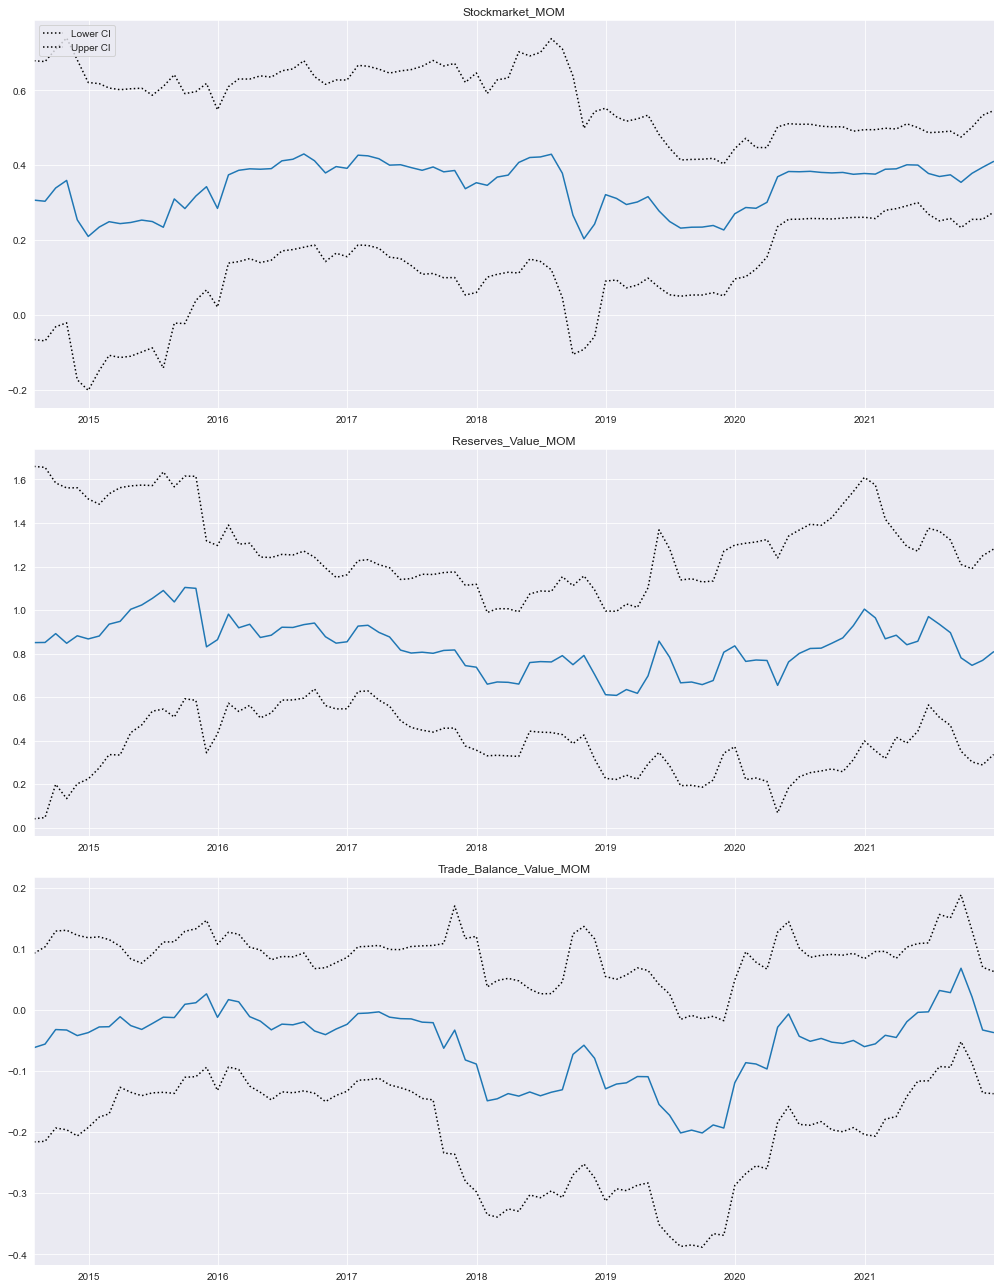

In [698]:
#Plot the variables to decide if the beta is robust over time or not:

exog_vars = ["Stockmarket_MOM", "Reserves_Value_MOM", "Trade_Balance_Value_MOM"]
exog = sm.add_constant(Macro_Change[exog_vars])
rols = RollingOLS(endog, exog, window=30)
rres = rols.fit()
fig = rres.plot_recursive_coefficient(variables=exog_vars, figsize=(14, 18))
#plt.savefig('RollingRegression_AUD_USD.png')